# Calibration

In [467]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('default')
mpl.rcParams['font.size'] = 18
mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True
mpl.rcParams['xtick.major.size'] = 3.5
mpl.rcParams['xtick.minor.size'] = 2
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.major.size'] = 3.5
mpl.rcParams['ytick.minor.size'] = 2
mpl.rcParams['ytick.minor.visible'] = True

In [468]:
Channel_energy_dict = {
    883:686.1,
    833: 647.2, 
    783: 608.4, 
    733: 569.5, 
    683: 530.7, 
    633: 491.8,
    583: 453, 
    533: 414.1, 
    483: 375.3, 
    433: 335.4,
    383: 297.6,
    333: 258.7,
    283: 219.9,
    233: 181.0,
    183: 142.2,
    133: 103.3,
    83:64.5
}

In [469]:
values, cov = np.polyfit(list(Channel_energy_dict.keys()), list(Channel_energy_dict.values()),1, cov = True) # Find error

In [470]:
m = values[0]
b = values[1]
np.linalg.det(np.diag(cov[0]))

-2.072624593736258e-12

In [471]:

print(f"m: {m}")
print(f"b: {b}")

m: 0.777049019607843
b: -0.09702941176468122


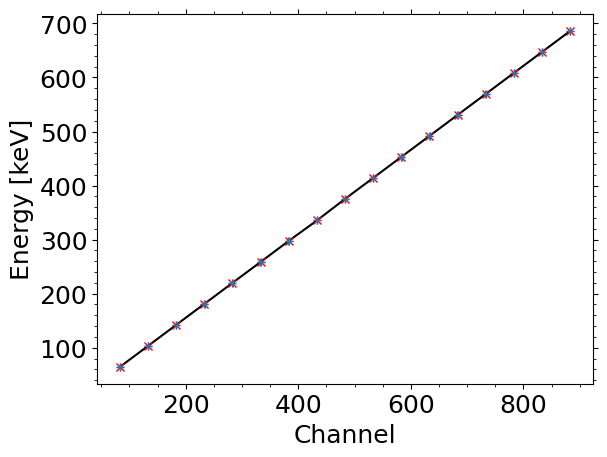

In [472]:
plt.plot(Channel_energy_dict.keys(), Channel_energy_dict.values(), 'k-')
plt.plot(Channel_energy_dict.keys(), Channel_energy_dict.values(), 'rx')
plt.xlabel("Channel")
plt.ylabel("Energy [keV]");
plt.errorbar(Channel_energy_dict.keys(), Channel_energy_dict.values(), xerr = 0.5, yerr = 0, fmt = " ", capsize= 3)
plt.savefig("Calibration.png", bbox_inches = "tight")

From this calibration graph, we can conclude that each channel corresponds to $\sim 0.78$ keV. From now on, all the graphs must make this correction

$$\mathrm{Energy} = 0.777/\mathrm{Channel}$$

to ensure that the data is the same across the board. This can be inputted into the software in the calibration tab, or be done in postprocessing, **but it must be done before any meaningful conclusions are drawn from the spectra**.

# Data Processing

Here I have written some code to analyze the data. It should work for a full txt file assuming the random bits of text file have been removed before. I will try to make it so that that doesn't have to be dealt with either, but without a sample it's hard to see how it could screw up the data.

This code also applies the aforementioned correction so that everything is in keV.

## Reading the data

To start with, we can process the data using a regular expression. The _how_ is not relevant, and I don't understand it that well myself, but the following function just removes anything that doesn't match begin with a digit followed by a semicolon: `digit:`

It then appends all of this to a string, and then writes that string to a file.

In [473]:
import re
def reorganize(og_path, result_path) -> None:
    """Takes a file as outputted by the software and reorganizes it in a new .txt file with 1024 lines, one for each channel."""
    f = open(og_path, "r")
    data = ''
    for x in f:
        x = x.strip()
        m = re.fullmatch(r'\d*:\ .*',x)
        if m:
            data += re.sub(r'\s+', ',', m.string) + '\n'
    f.close()
    with open(result_path, 'w') as file:
        file.write(data)

We can call this function on all the raw data we got from the experiment. We need one call per file

In [474]:
input_directory = "Measurements/ignacio niko/"
output_directory = "Measurements/Processed_data/"


# Background measurements
calibration_input_folder = input_directory + "Calibration/"
reorganize(calibration_input_folder + "background_weekend.txt", output_directory + "background.txt")

# Calibration measurements
reorganize(calibration_input_folder + "Cesium.txt", output_directory + "Cs_calibration.txt")

# Aluminum measurements
al_input_folder = input_directory +"Al measurements/"
# 140 deg
reorganize(al_input_folder + "Cs_al_40.txt", output_directory + "Cs_al_140.txt")
# 90 deg
reorganize(al_input_folder + "Cs_al_90.txt", output_directory + "Cs_al_90.txt")
# 45 deg
reorganize(al_input_folder + "Cs_al_135.txt", output_directory + "Cs_al_45.txt")
# 0 deg
reorganize(al_input_folder + "Cs_al_180.txt", output_directory + "Cs_al_0.txt")

# Copper measurements
cu_input_folder = input_directory +"cu/"
# 90 deg
reorganize(cu_input_folder + "90.txt", output_directory + "Cs_cu_90.txt")
# 45 deg
reorganize(cu_input_folder + "Cu_135.txt", output_directory + "Cs_cu_45.txt")
# 0 deg
reorganize(cu_input_folder + "180.txt", output_directory + "Cs_cu_0.txt")

# Iron measurements
fe_input_folder = input_directory + "Iron/"
# 140 deg
reorganize(fe_input_folder + "iron 40.txt", output_directory + "Cs_fe_140")
# 90 deg
reorganize(fe_input_folder + "iron 90.txt", output_directory + "Cs_fe_90.txt")
# 45 deg
reorganize(fe_input_folder + "iron 135.txt", output_directory + "Cs_fe_45.txt")
# 0 deg
reorganize(fe_input_folder + "iron 180.txt", output_directory + "Cs_fe_0.txt")

We can now dump the contents of our txt files into pandas dataframes for easier analysis.

In [475]:
output_directory = "Measurements/Processed_data/"

# Background
background = pd.read_csv(output_directory + "background.txt", header = None, index_col = 0)

# Calibration
Cs_calibration = pd.read_csv(output_directory + "CS_calibration.txt", header = None, index_col = 0)

# Aluminum measurements
# 0 deg
Cs_al_0 = pd.read_csv(output_directory + "Cs_al_0.txt", header = None, index_col = 0)
# 45 deg
Cs_al_45 = pd.read_csv(output_directory + "Cs_al_45.txt", header = None, index_col = 0)
# 90 deg
Cs_al_90 = pd.read_csv(output_directory + "Cs_al_90.txt", header = None, index_col = 0)
# 140 deg
Cs_al_140 = pd.read_csv(output_directory + "Cs_al_140.txt", header = None, index_col = 0)

# Copper measurements
# 0 deg
Cs_cu_0 = pd.read_csv(output_directory + "Cs_cu_0.txt", header = None, index_col = 0)
# 45 deg
Cs_cu_45 = pd.read_csv(output_directory + "Cs_cu_45.txt", header = None, index_col = 0)
# 90 deg
Cs_cu_90 = pd.read_csv(output_directory + "Cs_cu_90.txt", header = None, index_col = 0)

# Iron measurements
# 0 deg
Cs_fe_0 = pd.read_csv(output_directory + "Cs_fe_0.txt", header = None, index_col = 0)
# 45 deg
Cs_fe_45 = pd.read_csv(output_directory + "Cs_fe_45.txt", header = None, index_col = 0)
# 90 deg
Cs_fe_90 = pd.read_csv(output_directory + "Cs_fe_90.txt", header = None, index_col = 0)
# 140 deg
Cs_fe_140 = pd.read_csv(output_directory + "Cs_fe_140.txt", header = None, index_col = 0)

## Plotting  functions

Here we define some functions to plot the data, having options to plot them both with and without the background.

In [476]:
import matplotlib.pyplot as plt

def plot_no_background(data_df, background_df, live_time, **kwargs):
    '''Plots some data subtracting the background. The data needs to be normalized to be comparable'''
    data = np.concatenate(data_df.to_numpy())
    data = data/live_time
    background = np.concatenate(background_df.to_numpy())
    background = background/267537
    df = pd.DataFrame(data-background, columns = ['counts'])
    df.counts = df.counts/max(df.counts)
    plt.plot(df.index * 0.777 , df['counts'], **kwargs)
    plt.xlabel("Energy [keV]")
    plt.ylabel("Counts")
    plt.xlim(0, )
    plt.ylim(0, );

def plot_with_background(data_df, live_time):
    '''Plots the data with the background'''
    data = np.concatenate(data_df.to_numpy())
    df = pd.DataFrame(data, columns = ['counts'])
    df.counts = df.counts /live_time
    df.counts = df.counts/df.counts.max()
    df.index += 1
    plt.plot(df.index * 0.777 , df['counts'])
    plt.xlabel("Energy [keV]")
    plt.ylabel("Counts")
    plt.xlim(0,)
    plt.ylim(0,);

To test it, here is a plot of the calibration data with and without the background

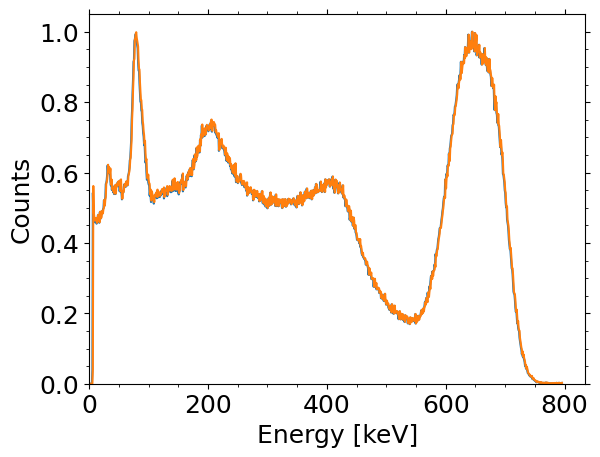

In [477]:
plot_no_background(Cs_calibration, background, 1538)
plot_with_background(Cs_calibration, 1538)
plt.savefig("Cs_calibration.png", bbox_inches = "tight")

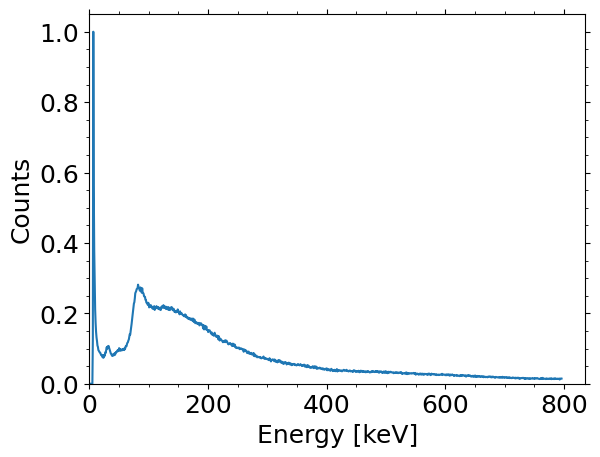

In [478]:
plot_with_background(background, 267537)

### Finding the local maxima

In this section we use the [argrelextrema](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.argrelextrema.html) function from scipy to find the maxima of the peaks. The peaks are then saved to a dataframe, from which the data can be extracted.

This function incorporates the channel - energy conversion mentioned earlier, so all the plots it produces are already in energy vs counts. It also checks if a dataframe object is passed for the background: if it is, it will subtract it from the measurements.

In [479]:
from scipy.signal import argrelextrema

def  plot_with_maxima(data_df, live_time, theta, shift = 0,  background_df = None):
    if background_df is None:
        data = np.concatenate(data_df.to_numpy())
        df = pd.DataFrame(data, columns = ['counts'])
        df.counts = df.counts /live_time
        df.counts = df.counts/df.counts.max()
    else:
        data = np.concatenate(data_df.to_numpy())
        data = data/live_time
        background = np.concatenate(background_df.to_numpy())
        background = background/267537 # Live time for the background
        df = pd.DataFrame(data-background, columns = ['counts'])
        df.counts = df.counts/max(df.counts)


    maxima = argrelextrema(df.to_numpy(), np.greater, order = 30)
    max_channels = maxima[0]
    maxima_df = df.iloc[max_channels]
    max_energies = maxima_df.index*0.777
    max_counts = maxima_df.counts
    test = pd.DataFrame([max_energies, max_counts])
    test = test.rename(index={0: "Energy", 1: "Counts"})
    plt.plot(df.index * 0.777 + shift , df.counts, label = f"$\\theta = {theta}$")
    plt.plot(maxima_df.index * 0.777 + shift, maxima_df.counts, 'r*')
    plt.xlabel("Energy [keV]");
    plt.ylabel("Counts")
    plt.xlim(0, )
    plt.ylim(0, );
    return test

As an example, here is the calibration data with the background removed

,0,1,2,3,4
Energy,31.080000,78.4770,205.128000,409.479000,644.133
Counts,0.622098,0.9987,0.750604,0.588858,1.000


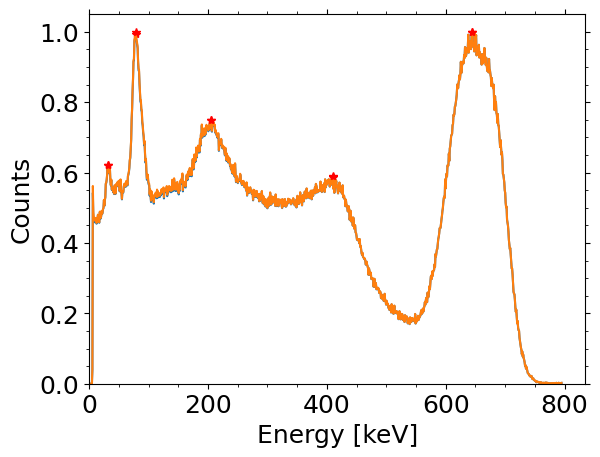

In [480]:
plot_with_maxima(Cs_calibration, 1538, "none", background_df= background)
plot_with_maxima(Cs_calibration, 1538, "none")
# (array([ 45,  98, 269, 392, 527, 829], dtype=int64), array([0, 0, 0, 0, 0, 0], dtype=int64))

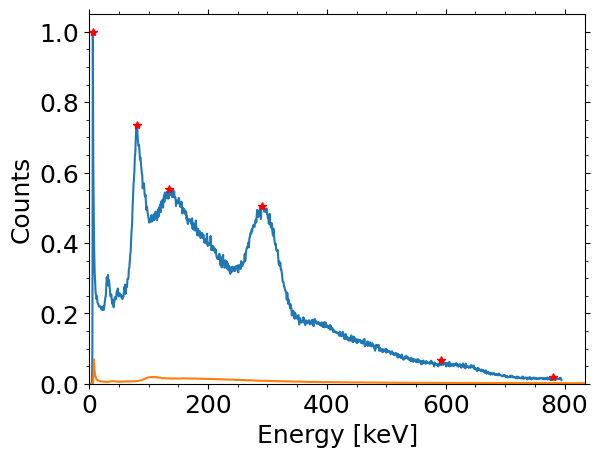

In [481]:
plot_with_maxima(Cs_al_90, 1538, 90)
bg = np.concatenate(background.to_numpy())
plt.plot(bg/267537)

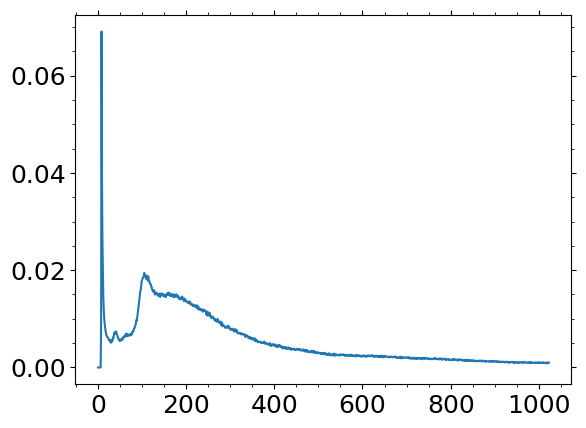

In [482]:
plt.plot(bg/267537)

We can see that the peak is at 644 keV, when it is supposed to be at 661.7 keV. However, even assuming the highest resolution this detector can go to (which as we will see later is lower than the ones we obtained in the experiment) which is about 8%, we still get the actual value within our error range:


$$644.133 \pm 8\% = 644.133 \pm (644.133\cdot0.08) \approx 640 \pm 51\text{ keV}$$

# Backscatter peak

We expect the backscatter peak and the Compton edge to add up to the photopeak due to conservation of energy, we can test this on the calibration data. Here, we have the photopeak at 644.133 keV, the Compton Edge at 409.479 keV and the backscatter peak at 216.783 keV. Assuming an error of 8% in both the backscatter and Compton Edge measurements, this is what we get:

$$216.783 \pm 8\% + 409.479 \pm 8\%$$

Passing this to absolute errors so we can do the arithmetic we have:
$$220 \pm 17  + 410 \pm 33 = 630 \pm 50\text{ keV}$$

This value includes both the experimental value obtained of 644.133 keV and the real value of 661.7 keV.

,0,1,2,3,4
Energy,31.080000,78.477000,205.128000,409.479000,644.133
Counts,0.620276,0.993916,0.748065,0.588393,1.000


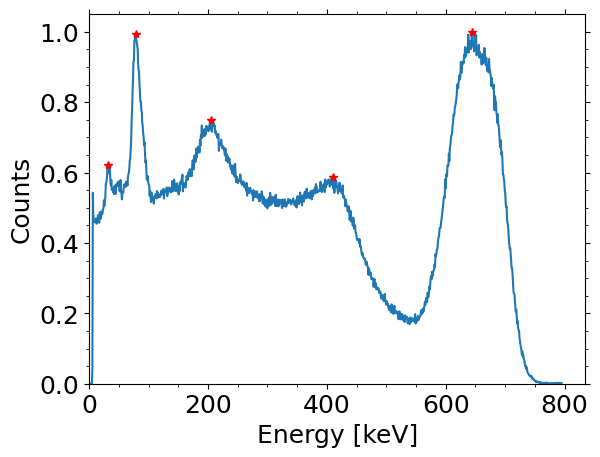

In [483]:
plot_with_maxima(Cs_calibration, 1538, "none", background_df= background)

# Energy resolution

To measure the energy resolution, we take the photopeak and grab the FWHM. The ratio between the two is the resolution:

$$\text{Energy resolution} = \frac{\Delta E}{E_{\text{max}}}\cdot 100$$
where $\Delta E$ is the FWHM and $E_{\text{max}}$ is the energy of the peak of the photopeak.

To find this, we can try several different approaches. Firstly, we'll try to fit some functions like a Lorentzian, a Gaussian or a Voigt (a combination of the two). Secondly, we will fit a sum of Lorentzians to it, in a pretty advanced algorithm we definitely did not shamelessly copy from [Stackoverflow](https://stackoverflow.com/questions/52502896/how-can-i-fit-a-good-lorentzian-on-python-using-scipy-optimize-curve-fit). Lastly, we create new data points and intercalate them, and just divide the maxima by 2. Simple yet effective.

## Method 1: Fitting functions

We start by fitting some functions to the photopeak.

## 1.1: Fitting a single Lorentzian, Gaussian or Voigt.
To start with, we can try fitting some functions to the photopeak to find the energy resolution. Here, a Voigt, a Gaussian and a Lorentzian fit are performed and compared.

In [484]:
def Voigt(x, ampG1, cenG1, sigmaG1, ampL1, cenL1, widL1):
    return (ampG1*(1/(sigmaG1*(np.sqrt(2*np.pi))))*(np.exp(-((x-cenG1)**2)/((2*sigmaG1)**2)))) + ((ampL1*widL1**2/((x-cenL1)**2+widL1**2)) )

In [485]:
def Gaussian(x, amp1,cen1,sigma1):
    return amp1*(1/(sigma1*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x-cen1)/sigma1)**2)))

In [486]:
def Lorentzian(x, amp, cen, wid):
    return amp*wid**2/((x-cen)**2+wid**2)

Take the values of only the photopeak

In [487]:
data = np.concatenate(Cs_calibration.to_numpy() / 1538 - background.to_numpy() / 267537)
df = pd.DataFrame(data, columns = ['counts'])
photopeak_x = df.index[700:950]
photopeak_y = df['counts'][700:950] / df['counts'][700:950].max()

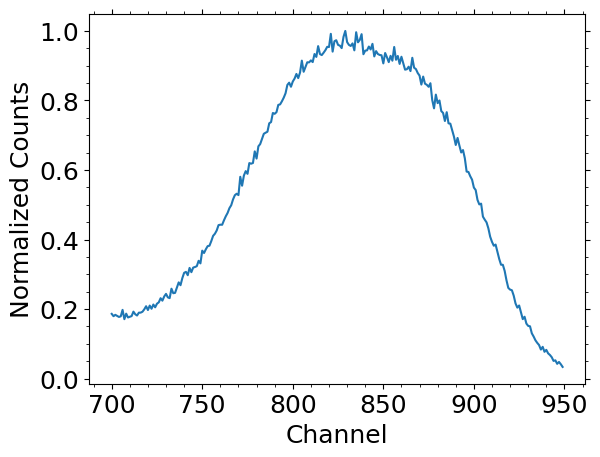

In [488]:
plt.plot(photopeak_x , photopeak_y)
plt.xlabel("Channel");
plt.ylabel("Normalized Counts");

### Fitting
Now we perform the fits using scipy and the three functions we defined above. Unfortunately for us, most of the fits do not work.

In [489]:
import scipy

popt_voigt, pcov_voigt = scipy.optimize.curve_fit(Voigt, photopeak_x, photopeak_y, maxfev = 1000000)
popt_gaussian, pcov_gaussian = scipy.optimize.curve_fit(Gaussian, photopeak_x, photopeak_y, maxfev = 1000000)
popt_lorentzian, pcov_lorentzian = scipy.optimize.curve_fit(Lorentzian, photopeak_x, photopeak_y, maxfev = 1000000)

perr_voigt = np.sqrt(np.diag(pcov_voigt))
perr_gaussian = np.sqrt(np.diag(pcov_gaussian))
perr_lorentzian = np.sqrt(np.diag(pcov_lorentzian))

C:\Users\cuco2\desktop\Verano2021\The_Bridge\env\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


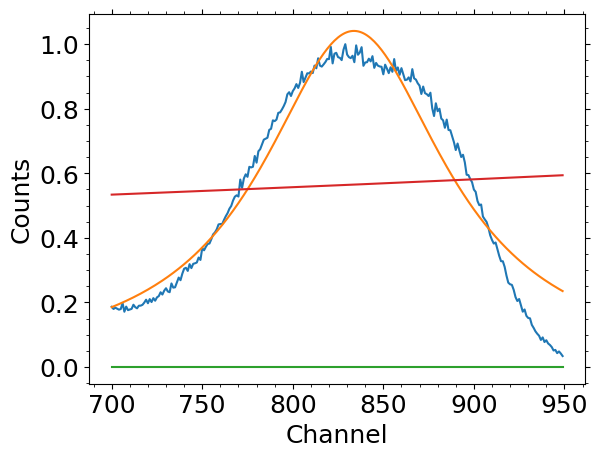

In [490]:
plt.plot(photopeak_x , photopeak_y)
plt.plot(photopeak_x, Voigt(photopeak_x, *popt_voigt))
plt.plot(photopeak_x, Gaussian(photopeak_x, *popt_gaussian))
plt.plot(photopeak_x, Lorentzian(photopeak_x, *popt_lorentzian))
plt.xlabel("Channel");
plt.ylabel("Counts");

So yeah, this method sucks. Let's try another.

### 1.2: Fitting a sum of Lorentzians

We can instead fit a sum of several (about 60) Lorentzians. While this works very well, it becomes very unwieldly if we want to find the values of the peak and the FWHM. I leave the code here in case anyone wants to play with it, but in my opinion it is  not the best approach.

In [491]:

photopeak_y.reset_index(inplace = True, drop = True)

[ 1.68680291e+01  9.74464643e+02 -9.81674797e+00  1.31952263e+02
  6.83499277e+02 -1.48751478e+01  2.62123860e+02  8.48393439e+02
 -1.46461088e-01  2.52112364e+01]


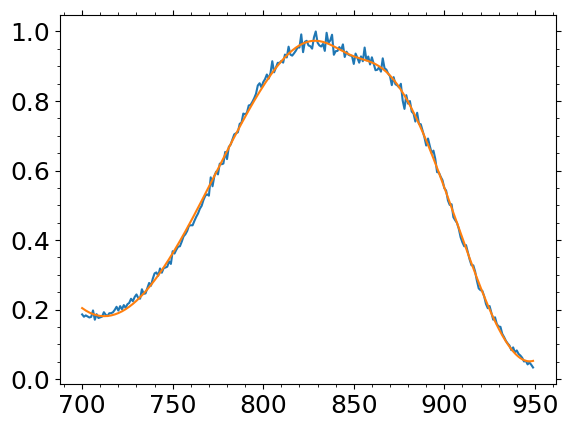

In [492]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import leastsq

def lorentzian( x, x0, a, gam ):
    return a * gam**2 / ( gam**2 + ( x - x0 )**2)

def multi_lorentz( x, params ):
    off = params[0]
    paramsRest = params[1:]
    assert not ( len( paramsRest ) % 3 )
    return off + sum( [ lorentzian( x, *paramsRest[ i : i+3 ] ) for i in range( 0, len( paramsRest ), 3 ) ] )

def res_multi_lorentz( params, xData, yData ):
    diff = [ multi_lorentz( x, params ) - y for x, y in zip( xData, yData ) ]
    return diff

# xData, yData = np.loadtxt('HEMAT_1.dat', unpack=True )
# yData = yData / max(yData)
yData = photopeak_y
xData = photopeak_x
generalWidth = 1

yDataLoc = yData
startValues = [ max( yData ) ]
counter = 0
while max( yDataLoc ) - min( yDataLoc ) > .1:
    counter += 1
    if counter > 20: ### max 20 peak...emergency break to avoid infinite loop
        break
    minP = np.argmin( yDataLoc )
    minY = yData[ minP ]
    x0 = xData[ minP ]
    startValues += [ x0, minY - max( yDataLoc ), generalWidth ]
    popt, ier = leastsq( res_multi_lorentz, startValues, args=( xData, yData ) )
    yDataLoc = [ y - multi_lorentz( x, popt ) for x,y in zip( xData, yData ) ]

print(popt)
testData = [ multi_lorentz(x, popt ) for x in xData ]

fig = plt.figure()
ax = fig.add_subplot( 1, 1, 1 )
ax.plot( xData, yData )
ax.plot( xData, testData )
plt.show()

In [493]:
np.mean(popt)

291.7674390622857

As you can see, the fit loks awesome. Now, I have no idea about how we can extract data from it, but it looks cool and it sounds advanced. Also, I calculated the mean, but I have no idea how it relates to the experiment.

## Method 2: Using the maxima

Instead, I think that using the maxima and finding the FWHM dividing it by two is both much easier to implement and simpler to understand. However, since there were not many points, we created some artificial datapoints using interpolation.

In [494]:
x = np.linspace(700, 950, 4000)
interpolated = np.interp(x, photopeak_x, photopeak_y)

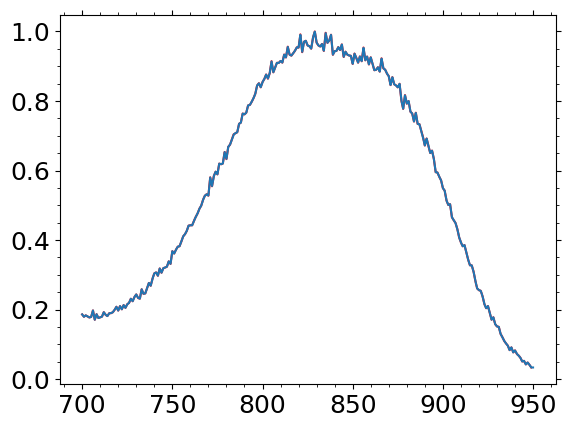

In [495]:
plt.plot(photopeak_x, photopeak_y, 'r')
plt.plot(x, interpolated) # No observable difference between the 2

Now if we take the values of anything greater than our FWHM that will give the top half of the plot above. Taking the first and last values of this array and finding the corresponding energy works pretty well for finding the energy resolution.

In [496]:
top_values = [i for i in interpolated if i > max(photopeak_y)/2]
FWHM_min_value = np.where(interpolated == top_values[0])
FWHM_max_value = np.where(interpolated == top_values[-1])

In [497]:
Delta_E = x[FWHM_max_value]-x[FWHM_min_value]
max_energy = np.where(photopeak_y == max(photopeak_y))[0]
max_energy += 700 # Correctiion since photopeak starts at channel 700

In [498]:
#energy resolution
Delta_E/max_energy*100

array([16.63564263])

So we have a resolution of 16%. This means that our error for earlier is almost double of what we originally had, so the real values are definitely in the range of our measurements. I'll take that, honestly.

# Compton Scattering
Having done some preliminary data analysis, we can now compute if the Compton Scattering formula holds.

## Simulation

The Compton Scattering formula is given by:

$$E'=\frac{E}{1+\frac{E}{m_ec^2}(1-\cos\theta)}$$

Which we have plotted for all 360 degrees

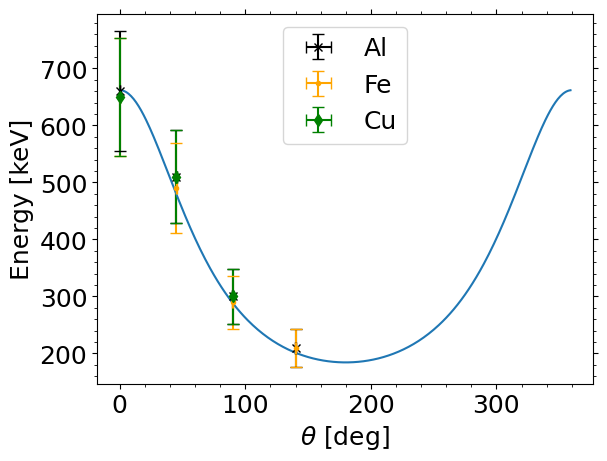

In [615]:
from scipy.constants import c, m_e, elementary_charge
def scattering(E, theta, color = True):
    E_scatter = E/(1+(E/(m_e*c**2/elementary_charge))*(1-np.cos(np.radians(theta))))/1e3
    return E_scatter

Cs_energy = 0.6617e6
energies = [scattering(Cs_energy, i) for i in range(360)]
energies = np.array(energies)
plt.plot(range(360), energies)

x_values = np.array([0, 45, 90, 140])
x_error = 0.5 * np.sin(x_values)

# x for al
y_values_al = np.array([660, 510, 300, 210])
y_error_al = y_values_al * 0.16

y_values_fe = np.array([650, 490, 290, 210])
y_error_fe = y_values_fe * 0.16

# x for Cu
y_values_cu = np.array([650, 510, 300])
y_error_cu = y_values_cu * 0.16
x_values_cu = np.array([0, 45, 90])
x_error_cu = 0.5 * np.sin(y_values_cu)

plt.errorbar(x_values, y_values_al, xerr = x_error, yerr=y_error_al, fmt = 'x', capsize = 4, color = 'black', label = 'Al')
plt.errorbar(x_values, y_values_fe, xerr = x_error, yerr=y_error_fe, fmt = '.', capsize = 4, color = 'orange', label = 'Fe')
plt.errorbar(x_values_cu, y_values_cu, xerr = x_error_cu, yerr=y_error_cu, fmt = 'd', capsize = 4,  color = 'green', label = 'Cu')
plt.xlabel("$\\theta$ [deg]")
plt.ylabel("Energy [keV]")
plt.legend(loc = 'best')
plt.savefig("Energies experimental 2", bbox_inches = "tight")

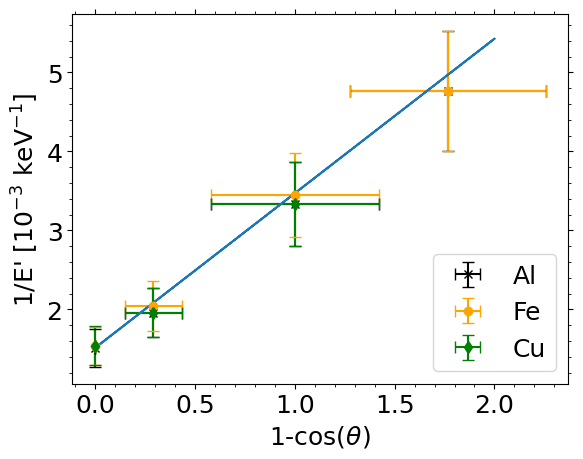

In [613]:
inverse_energies = 1/energies
angles = np.arange(0, 360, 1)
plt.plot(1-np.cos(np.radians(angles)), inverse_energies)
# Experimental values
# Y is constant
experimental_angles = np.array([0, 45, 90, 140])
x_values = 1-np.cos(np.radians(experimental_angles))
x_error = 0.5 * np.sin(x_values)
# x for al
experimental_energies_al = np.array([660, 510, 300, 210])
y_values_al = 1/experimental_energies_al
y_error_al = y_values_al * 0.16

# x for fe
experimental_energies_fe = np.array([650, 490, 290, 210])
y_values_fe = 1/experimental_energies_fe
y_error_fe = y_values_fe * 0.16

# x for Cu
experimental_energies_cu = np.array([650, 510, 300])
y_values_cu = 1/experimental_energies_cu
y_error_cu = y_values_cu * 0.16
experimental_angles_cu = np.array([0, 45, 90])
x_values_cu = 1-np.cos(np.radians(experimental_angles_cu))
x_error_cu = 0.5 * np.sin(x_values_cu)

plt.errorbar(x_values, y_values_al, xerr = x_error, yerr = y_error_al, fmt = 'x', capsize = 4, color = 'black', label = 'Al')
plt.errorbar(x_values, y_values_fe, xerr = x_error, yerr = y_error_al, fmt = 'o', capsize = 4, color = 'orange', label = 'Fe')
plt.errorbar(x_values_cu, y_values_cu, xerr = x_error_cu, yerr = y_error_cu, fmt = 'd', capsize = 4, color = 'green', label = 'Cu')
plt.ylabel("1/E' [$10^{-3}$ keV$^{-1}$]")
plt.xlabel("1-cos($\\theta$)")
plt.yticks([0.002, 0.003, 0.004, 0.005], [2,3,4,5])
plt.legend(loc = 'lower right')
plt.savefig("Experimental data.png", bbox_inches = "tight")
fitty = (np.polyfit(np.concatenate([x_values, x_values_cu, x_values]), np.concatenate([y_values_al, y_values_cu, y_values_fe]),1, cov = True))

In [501]:
errore = np.sqrt(np.diag(fitty[1]))

In [502]:
1/fitty[0][0] * (errore[0] / fitty[0][0])

7.4623002731557255

In [503]:
1/fitty[0][1] * (errore[1] / fitty[0][1])

10.612914959286453

In [504]:
from uncertainties import ufloat
from uncertainties.umath import cos as cosine
x = ufloat(90, 5)
cosine(x)

-0.4480736161291701+/-4.4699833180027895

## Experimental data

We can compare the simulation to the data obtained in the experiment. For this example, I will be using the measurement with aluminum and $\theta = 140^\circ$. If this data has not been processed, please refer to the top of the notebook and run that cell.

Once that's done, we can crack on with the following cells.

## Aluminum

,0,1,2,3,4
Energy,30.303000,77.700000,198.13500,400.155000,648.795
Counts,0.608951,0.994327,0.78467,0.602283,1.000


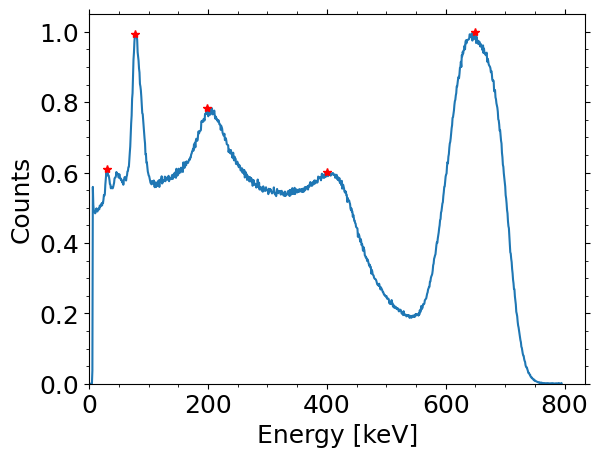

In [505]:
plot_with_maxima(Cs_al_0, 10684, 0, background_df= background)

In [506]:
scattering(Cs_energy, 0)

661.7

#### 45 degrees

,0,1,2,3,4,5,6,7,8
Energy,33.411000,78.477,121.989000,198.912000,266.511000,334.110000,370.629000,493.395000,627.039000
Counts,0.540526,1.000,0.594318,0.647426,0.489962,0.438464,0.412564,0.553495,0.441759


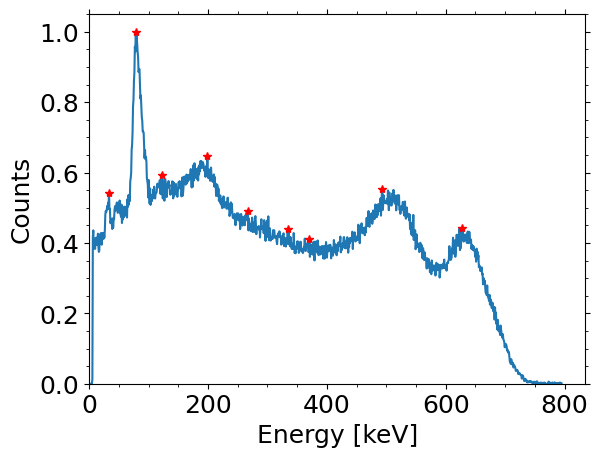

In [507]:
plot_with_maxima(Cs_al_45, 17464,  45, background_df= background)

In [508]:
scattering(Cs_energy, 45)

479.7459396308574

#### 90 degrees

,0,1,2,3,4,5,6,7,8
Energy,31.857000,80.808,142.968000,204.351000,291.375000,379.953000,592.074000,634.032000,780.885000
Counts,0.433267,1.000,0.741772,0.593312,0.884381,0.285787,0.087372,0.079099,0.012888


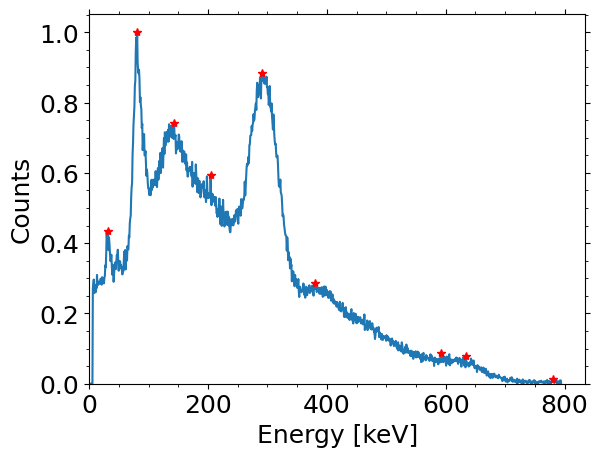

In [509]:
plot_with_maxima(Cs_al_90, 72712, 90,  background_df=background)

In [510]:
scattering(Cs_energy, 90)

288.3331695773821

#### 140 degrees

,0,1,2,3,4
Energy,31.080000,79.254000,208.236,618.492000,773.115000
Counts,0.239891,0.519471,1.000,0.122348,0.006667


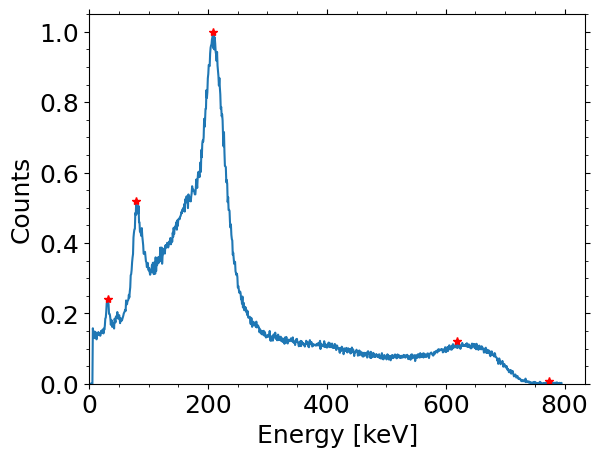

In [511]:
# plot_with_maxima(Cs_al_140, 68219, 140)
plot_with_maxima(Cs_al_140, 68219, 140,  background_df=background)

In [512]:
scattering(Cs_energy, 140)

201.31573352822633

### Copper

#### 0 degrees

,0,1,2,3,4
Energy,31.080000,78.477,204.351000,407.148000,647.241000
Counts,0.579307,1.000,0.753985,0.536414,0.812277


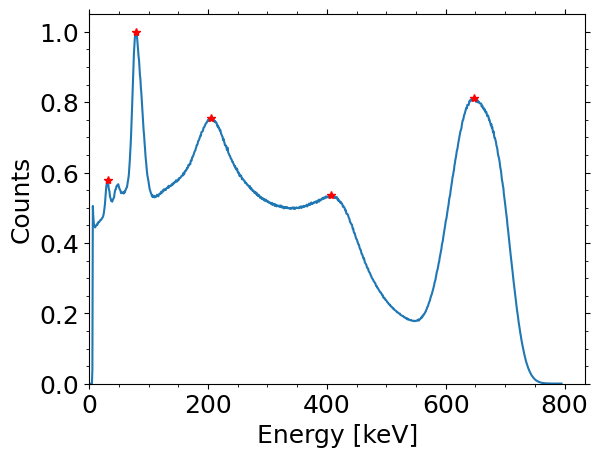

In [513]:
# plot_with_maxima(Cs_cu_0, 334291,  0)
plot_with_maxima(Cs_cu_0, 334291, 0,  background_df=background)

In [514]:
scattering(Cs_energy, 0)

661.7

#### 45 degrees

,0,1,2,3,4
Energy,30.303000,80.031,192.696000,506.604000,634.809000
Counts,0.546778,1.000,0.683575,0.601036,0.383911


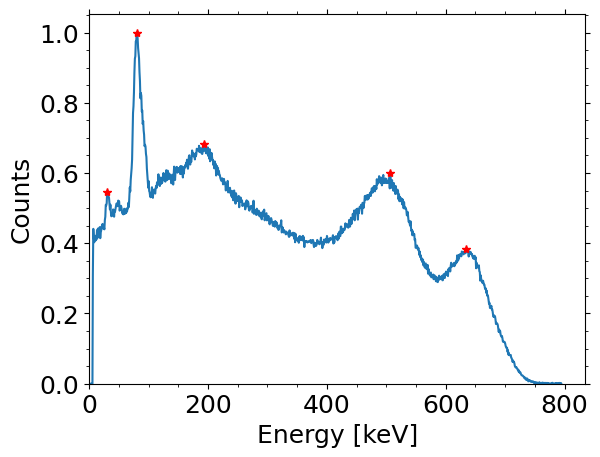

In [515]:
# plot_with_maxima(Cs_cu_45, 68085,  45)
plot_with_maxima(Cs_cu_45, 68085, 45,  background_df=background)

In [516]:
scattering(Cs_energy, 45)

479.7459396308574

#### 90 degrees

,0,1,2,3,4,5
Energy,31.080000,83.139000,142.968000,300.699,634.809000,780.885000
Counts,0.427265,0.916789,0.797995,1.000,0.075207,0.010927


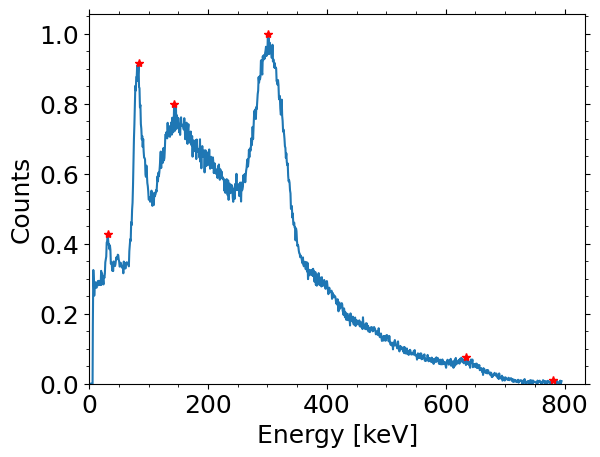

In [517]:
plot_with_maxima(Cs_cu_90, 71059,  90, background_df= background)

In [518]:
scattering(Cs_energy, 90)

288.3331695773821

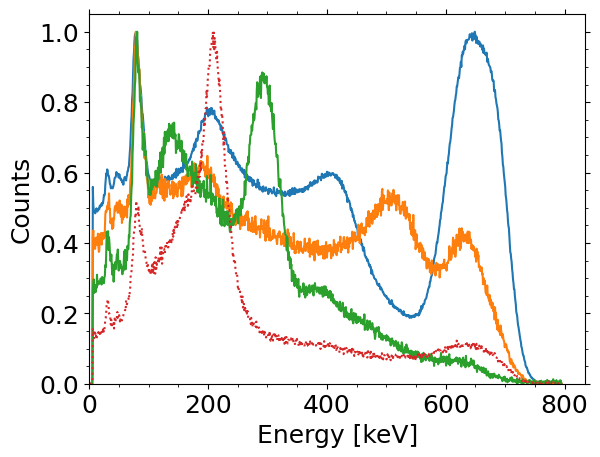

In [519]:
plot_no_background(Cs_al_0,background, 10684, label = '$\\theta = 0^\circ$')
plot_no_background(Cs_al_45,background, 17464, label = '$\\theta = 45^\circ$')
plot_no_background(Cs_al_90,background, 72712, label = '$\\theta = 90^\circ$')
plot_no_background(Cs_al_140,background, 68219,  linestyle = 'dotted',  label = '$\\theta = 140^\circ$')
plt.savefig("Aluminum spectrum.png", bbox_inches = "tight")

#### Iron

# 0 degrees

,0,1,2,3,4
Energy,30.303000,78.477,205.128000,401.709000,643.356000
Counts,0.486852,1.000,0.704862,0.382668,0.468159


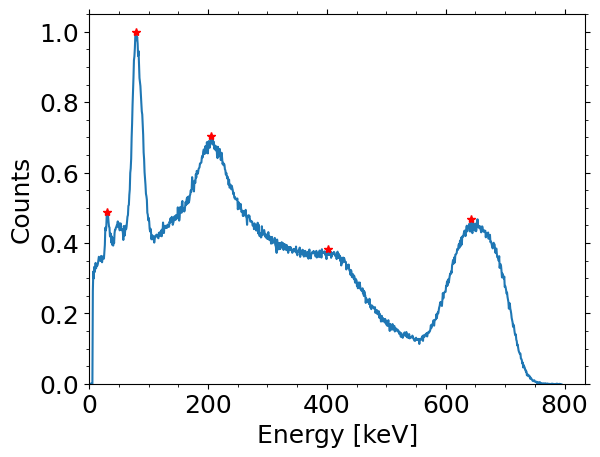

In [520]:
# plot_with_maxima(Cs_fe_0, 0)
plot_with_maxima(Cs_fe_0, 19812,  0,  background_df=background)

In [521]:
scattering(Cs_energy, 0)

661.7

#### 45 degrees

,0,1,2,3,4,5
Energy,32.634000,79.254,194.250000,507.381000,643.356000,787.87800
Counts,0.521151,1.000,0.672472,0.599764,0.399918,0.00528


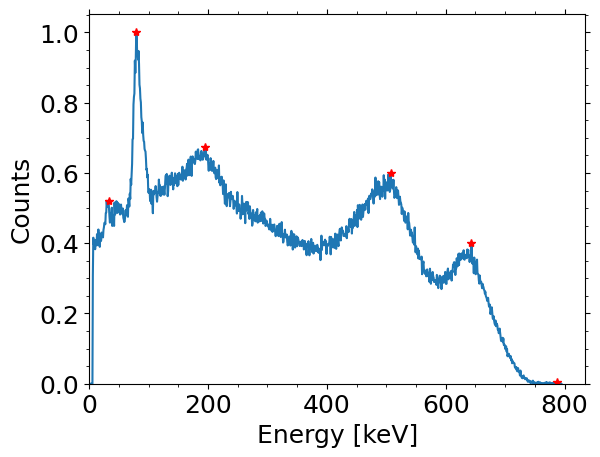

In [522]:
plot_with_maxima(Cs_fe_45, 19812,  0,  background_df=background)

#### 90 degrees

,0,1,2,3,4,5,6,7
Energy,29.526000,80.808,142.191000,295.260000,382.284000,622.377000,738.927000,773.115000
Counts,0.353666,1.000,0.450561,0.400264,0.279552,0.077342,0.012372,0.011808


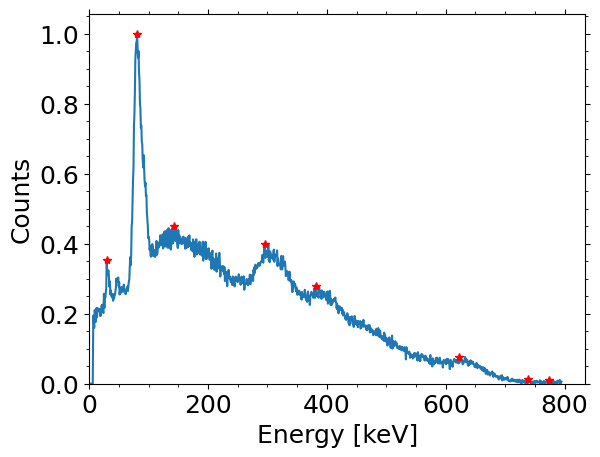

In [523]:
# plot_with_maxima(Cs_fe_90, 90)
plot_with_maxima(Cs_fe_90, 78449, 90,  background_df=background)

In [524]:
scattering(Cs_energy, 90)

288.3331695773821

#### 140 degrees

,0,1,2,3,4,5,6,7,8
Energy,30.303000,80.808,205.128000,314.685000,400.155000,424.242000,506.604000,655.788000,792.540000
Counts,0.336996,1.000,0.763545,0.269923,0.241635,0.221081,0.183355,0.250738,0.005918


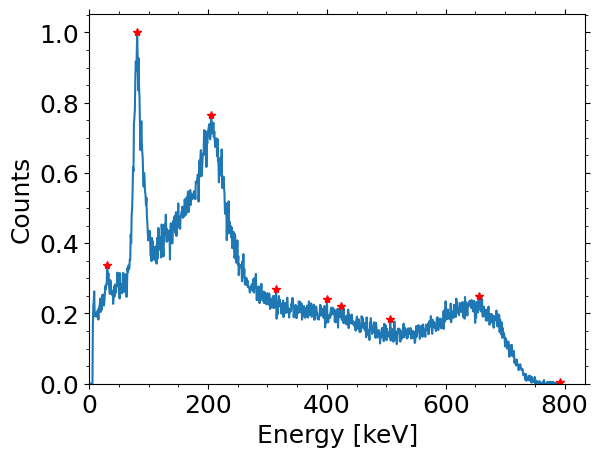

In [525]:
plot_with_maxima(Cs_fe_140, 15051, 140,  background_df=background)

In [526]:
scattering(Cs_energy, 140)

201.31573352822633

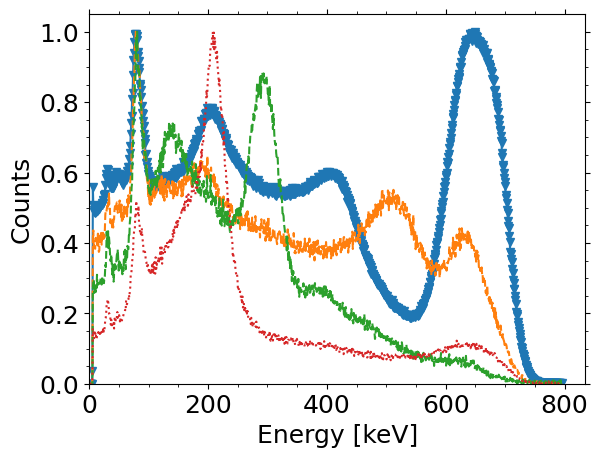

In [610]:
plot_no_background(Cs_al_0,background, 10684, marker = 'v', color = '#1f77b4', label = '$0^\circ$')
plot_no_background(Cs_al_45,background, 17464,linestyle = '--', color = '#ff7f0e', label = '$45^\circ$')
plot_no_background(Cs_al_90,background, 72712, linestyle = 'dashed', color = '#2ca02c', label = '$90^\circ$')
plot_no_background(Cs_al_140,background, 68219, linestyle = 'dotted',color = '#d62728',  label = '$140^\circ$')

plt.savefig("Aluminum spectrum.png", bbox_inches = "tight")

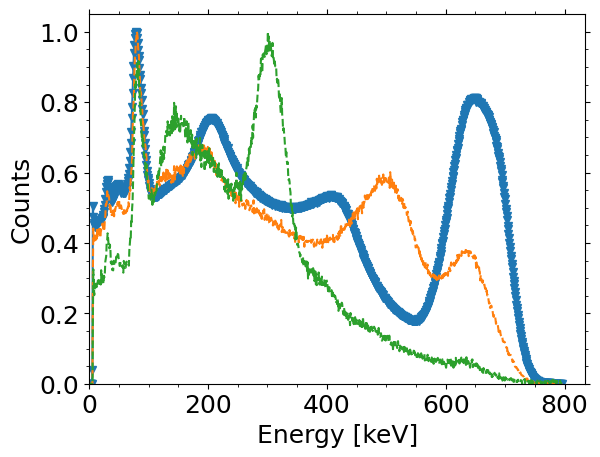

In [611]:
plot_no_background(Cs_cu_0,background, 334291, color = '#1f77b4', marker = 'v', label = '$\\theta = 0^\circ$')
plot_no_background(Cs_cu_45,background, 68085, color = '#ff7f0e', linestyle = '--', label = '$\\theta = 45^\circ$')
plot_no_background(Cs_cu_90,background, 71059, color = '#2ca02c', linestyle = 'dashed', label = '$\\theta = 90^\circ$')
# plot_no_background(Cs_al_140,background, 68219, label = '$\\theta = 140^\circ$')
# plt.legend(loc = 'upper right')
plt.savefig("Copper spectrum.png", bbox_inches = "tight")

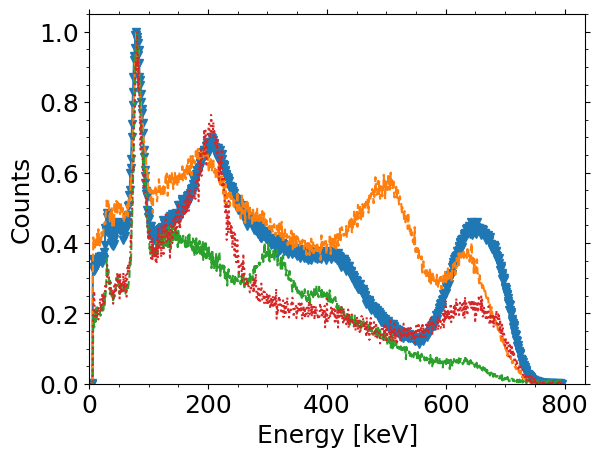

In [612]:
plot_no_background(Cs_fe_0,background, 12926, color = '#1f77b4', marker = 'v', label = '$\\theta = 0^\circ$')
plot_no_background(Cs_fe_45,background, 19812, color = '#ff7f0e', linestyle = '--', label = '$\\theta = 45^\circ$')
plot_no_background(Cs_fe_90,background, 78449, color = '#2ca02c', linestyle = 'dashed', label = '$\\theta = 90^\circ$')
plot_no_background(Cs_fe_140,background, 15051, color = '#d62728', linestyle = 'dotted', label = '$\\theta = 140^\circ$')
# plt.legend(loc = 'upper right')
plt.savefig("Iron spectrum.png", bbox_inches = "tight")


# Klein Nishina: Scattering cross section
For the Compton Scattering, the differential cross section is given by

$$\frac{\mathrm{d}\sigma}{\mathrm{d}\Omega}=\frac{r_0^2}{2}\left(\frac{1+\cos^2\theta}{(1+\alpha(1-\cos\theta))^2}\right)\times\left(1+\frac{\alpha^2(1-\cos\theta)^2}{(1+\cos^2\theta)(1+\alpha(1-\cos\theta))^2}\right)\text{ m}^2\text{sr}^{-1}$$

where $r_0$ is the classical electron radius, given by
$$r_0 = \frac{e^2}{4\pi\varepsilon_0mc^2}\approx2.82\times10^{-15}$$ m $\sigma$ is the scattering cross section, $\Omega$ is the solid angle in steradians and $\alpha = \frac{E_\gamma}{mc^2}$.

From my brief foray into the literature this can model the Compton Continuum, but we're not doing that here. Instead, we are measuring the cross section at the photopeak using the following formula:

$$\left[\frac{\mathrm{d}\sigma}{\mathrm{d}\Omega}\right]_\theta = \frac{S(\theta)}{(N_e)(\Delta\Omega)I}$$
where
$$S(\theta) = \frac{\text{total photopeak counts at } \theta \text{ (per second)}}{\text{intrinsic photopeak detector
efficiency (8.5\% in Appendix 2)}}$$
and $\Delta\Omega$ is the solid angle (in steradians) of the detector, given by:
$$\Delta\Omega = \frac{\text{open area of the detector }\left(\text{cm}^2\right)}{[\text{distance from scatter to detector (cm)}]^2}$$
$N_e$ is the amount of electrons in the scattering sample and $I$ is the number of incident gamma rays hitting the scatterer per square metre per second.

To find $N_e$ assume that the Cs is a point source at the centre of the lead block - the exit aperture of the block is 12.5 mm in diameter.

We can begin by calculating the amount of counts in a photopeak.

## Finding the counts of the photopeak

Doing this is going to require some handwork, since I cannot really think of a way to automate it properly. Our process is as follows:
1. By looking at the plot, find the photopeak for a given angle and metal
2. Approximately estimate the beginning and end channel of this photopeak, and do that a couple of times until it looks right.
3. Calculate the integral of half of the photopeak and multiply it by 2 to have the total number of counts.

To do that last step, we make use of the trapezoid method. We also previously smooth the data so that the integral is a bit easier to calculate. Now, the problem here is when we have a photopeak that does not get to 0 at any point, but once we get there I'll explain how I'm planning on solving that problem. Now that the underlying method is somewhat clear, let's show an example

### Iron at 0 degrees (Cs source)

We start by plotting the data we obtained

,0,1,2,3,4
Energy,30.303000,78.477,205.128000,401.709000,643.356000
Counts,0.485172,1.000,0.701806,0.378234,0.460597


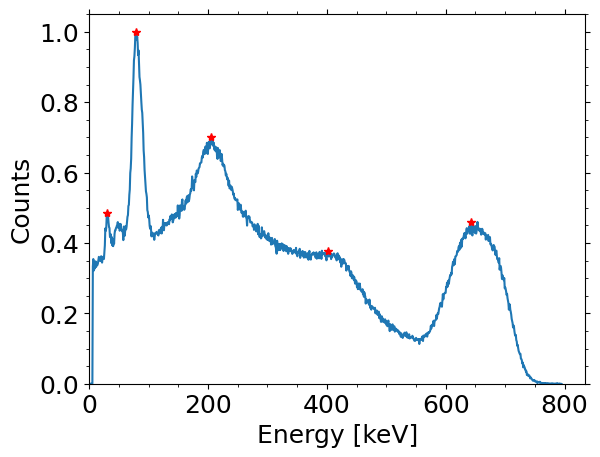

In [530]:
plot_with_maxima(Cs_fe_0, 12927,  0,  background_df=background)

We can compare that to the value predicted by theory, given by the scattering formula shown above

In [531]:
scattering(Cs_energy, 0)

661.7

So out peak is somewhere around 661.7 keV. The closest one we have in the data is the 643.35 one, so let's go with that. We can now plot the data to focus solely on this peak. This will be tricky to get right because the plot above has energy on the x-axis, not channels, so we will have to make a ballpark conversion. It's also counts per second we are interested in, so we have to divide by the time the measurement took. In the case of this one, it was 19812 s.

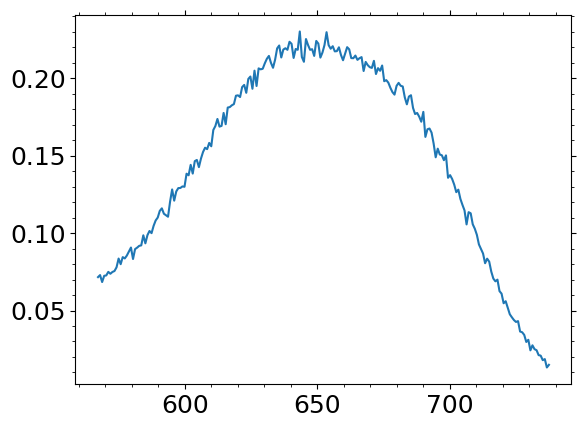

In [532]:
Fe_example = np.concatenate(Cs_fe_0.to_numpy())[730:950]/12927
plt.plot(np.arange(730, 950, 1) * 0.777, Fe_example)

Something like that will probably work. Now we can apply a filter to smooth the data. Here we use the Savgol filter.

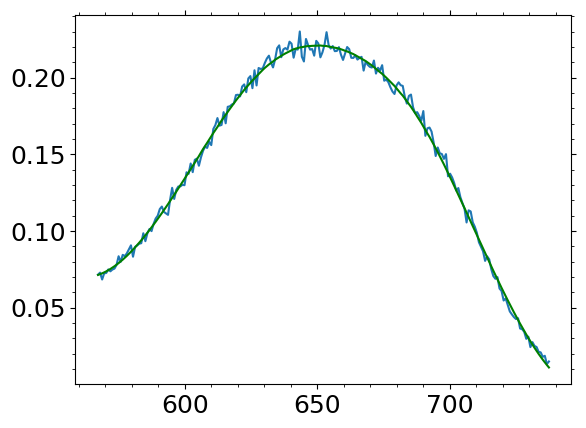

In [533]:
from scipy.signal import savgol_filter
Fe_example_filtered = savgol_filter(Fe_example, 99, 3)
plt.plot(np.arange(730, 950, 1) * 0.777, Fe_example)
plt.plot(np.arange(730, 950, 1) * 0.777, Fe_example_filtered, 'g-');

We will take the RHS of this, since it reaches 0, and assume symmetry in the photopeak. In this case, that's the part under the red line.

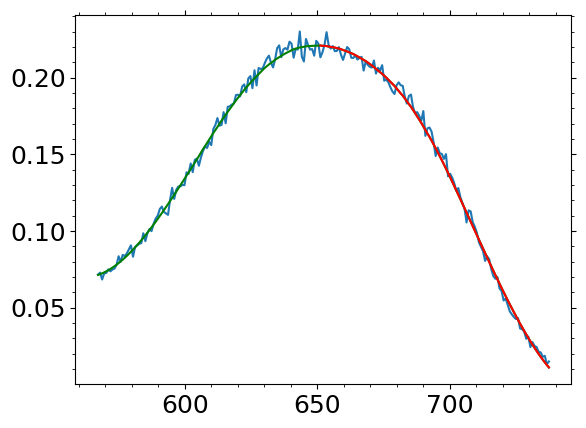

In [534]:
max_index = np.where(Fe_example_filtered == Fe_example_filtered.max())[0][0]
plt.plot(np.arange(730, 950, 1) * 0.777, Fe_example)
plt.plot(np.arange(730, 950, 1) * 0.777, Fe_example_filtered, 'g-')
plt.plot(np.arange((730 + max_index) , 730 + len(Fe_example_filtered),1) * 0.777, Fe_example_filtered[max_index:], 'r-');

For cases in which the data does not reach 0, we can fit a function to it. We can start with a Gaussian like the one we defined earlier. We're using the lmfit package for this, with its GaussianModel class.

In [535]:
from lmfit.models import GaussianModel, LorentzianModel

# Define an x axis that only takes the red line.
x = np.arange((730 + max_index) , 730 + len(Fe_example_filtered),1)

<AxesSubplot:title={'center':'Model(gaussian)'}, xlabel='x', ylabel='y'>

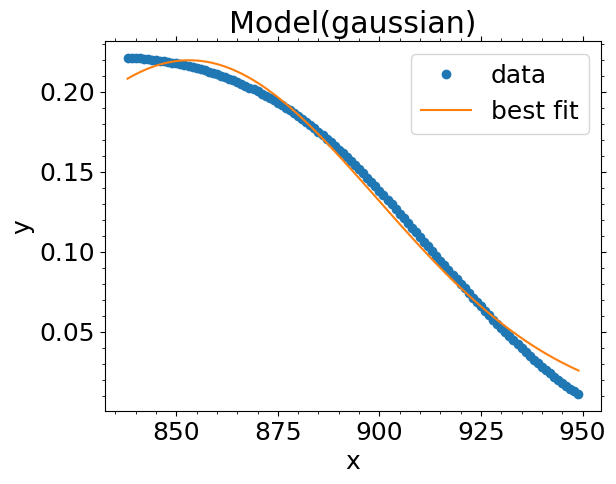

In [536]:
# Do the fitting
model = GaussianModel()
params = model.guess(Fe_example_filtered[max_index:], x=x)

result = model.fit(Fe_example_filtered[max_index:], params,  x=x)
result.plot_fit()

So the fit is quite good on the part we care about. We can see how it looks overall by extending it to the sides.

,0,1,2,3,4
Energy,30.303000,78.477,205.128000,401.709000,643.356000
Counts,0.485172,1.000,0.701806,0.378234,0.460597


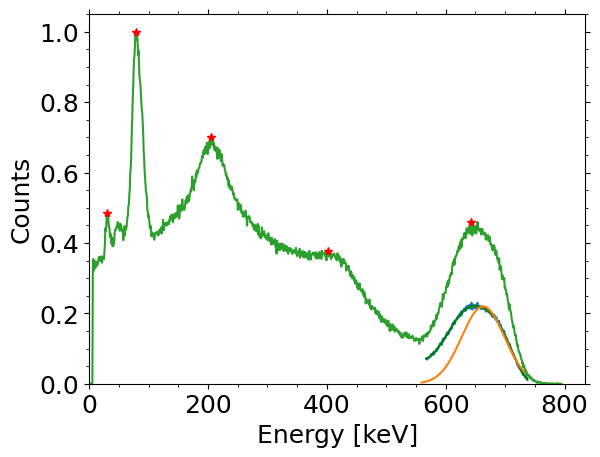

In [537]:
plt.plot(np.arange(730, 950, 1) * 0.777, Fe_example)
plt.plot(np.arange(730, 950, 1) * 0.777, Fe_example_filtered, 'g-');
plt.plot(np.arange(730 - 10, 950 + 10, 1) * 0.777, Gaussian(np.arange(730 - 10, 950 + 10, 1), *result.best_values.values()), label = 'fit');
plot_with_maxima(Cs_fe_0, 12927,  0,  background_df=background)

In [538]:
max_index

108

We can now integrate this. To do so, we use the quad method from scipy, and integrate from $-\inf$ to $\inf$, which will give us the area under the curve. Using this doesn't work very well, perhaps someone who knows more about computers can tell you why, so instead we will integrate over the range of the image.

In [539]:
from scipy.integrate import quad

example_intgral = quad(Gaussian, 750 - 1000, 950 + 1000, args=tuple(result.best_values.values()))

example_intgral

(25.44461853849555, 2.091940610684428e-11)

Putting it all together, we get the following functions. The first one plots just the peak, to get a feel for how good our ballpark estimation is, the other one does the fitting and all that good stuff.

In [540]:
def plot_peak(df, time, start, end):
    y = np.concatenate(df.to_numpy())[start:end]/time
    y_filtered = savgol_filter(y, 99, 3)
    x = np.arange(start, end, 1)
    plt.plot(x * 0.777, np.concatenate(df.to_numpy())[start:end]/time)
    plt.plot(x * 0.777, y_filtered, 'k-')
    max_index = np.where(y_filtered == y_filtered.max())[0][0]
    plt.plot(np.arange(start + max_index, start + len(y_filtered),1) * 0.777, y_filtered[max_index:], 'g-')
    plt.ylabel("Normalized counts")
    plt.xlabel("Energy [keV]")

def photopeak_counter(df, time, start, end, report = False, scale = 1, **kwargs):
    y = np.concatenate(df.to_numpy())[start:end]/time
    y_filtered = savgol_filter(y, 99, 3)
    x = np.arange(start, end, 1)
    plt.plot(x * 0.777, np.concatenate(df.to_numpy())[start:end]/time * scale)
    plt.plot(x * 0.777, y_filtered * scale, 'k-')
    max_index = np.where(y_filtered == y_filtered.max())[0][0]
    plt.plot(np.arange(start + max_index, start + len(y_filtered),1) * 0.777, y_filtered[max_index:] *scale, 'g-')
    plt.ylabel("Normalized counts")
    plt.xlabel("Energy [keV]")

    # Fitting

    model = GaussianModel()
    params = model.guess(y_filtered, x=x)
    result = model.fit(y_filtered, params,  x=x)
    if report:
        print(result.fit_report())
    plt.plot(np.arange(start - 200, end + 200, 1) * 0.777, Gaussian(np.arange(start - 200, end + 200, 1), *result.best_values.values()) * scale, label = 'fit')
    plt.fill_between(np.arange(start - 200, end + 200, 1) * 0.777, Gaussian(np.arange(start - 200, end + 200, 1), *result.best_values.values()) * scale, alpha = 0.5, color = 'lightgray')
    # Integration
    I = quad(Gaussian, start - 1000, end + 1000, args=tuple(result.best_values.values()))
    return I

(34.28799343592349, 4.670981035797108e-09)

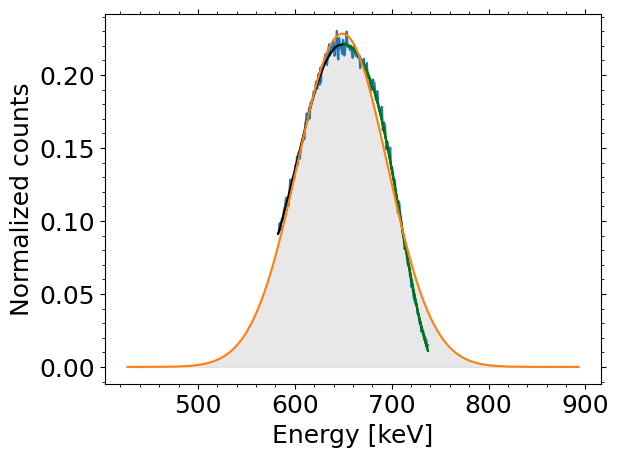

In [541]:
photopeak_count_fe_0 = photopeak_counter(Cs_fe_0, 12927, 750, 950)
photopeak_count_fe_0

We can now compute $S(\theta)$, as given above. The photopeak efficiency at this energy is roughly 0.09 from Appendix 2.

In [542]:
S_fe_0 = photopeak_count_fe_0[0]/ 0.09

To find $N_e$, we can assume that the photons are hitting a single layer of atoms in the scatterer. If the scatterer has radius $r$, meaning an area $A = \pi r^2$ and each atom has a radius $r_a$ and an area of $A_a = \pi r_a^2$, then there will be

$$N_{\text{atoms}} = \frac{A}{A_a}$$

And since each atom will have $Z$ atoms, we get

$$N_e = Z * N_{\text{atoms}}$$

In [543]:
radius_scatterer = 1e-2 # Has to be in meters. Also, change later for actual measurement
radius_iron_atom = 126e-12
Z_iron = 26
h = 12.5e-3
volume_scatterer = np.pi * radius_scatterer**2 * h
vol_atom = 4/3 * np.pi * radius_iron_atom**3

No_atoms = volume_scatterer/vol_atom
N_e = Z_iron * No_atoms
N_e

1.2185209180674035e+25

Now we can move on to find $\Delta\Omega$, which was given by

$$\Delta\Omega = \frac{\text{open area of the detector }\left(\text{cm}^2\right)}{[\text{distance from scatter to detector (cm)}]^2}$$

To find the opn area of the detector, we can measure its radius (1cm), so that's a straightforward calculation. The distance to the scatterer can be measured, and is constant at 9.5 cm.

Lastly, we need to calculate $I$. To do so, we'll be assuming that the activity of the Cs source was 24.7 Mbq on 1/09/2001 and its half life is 30.17 years, we get:

$$A = A_0e^{-\lambda t}$$

where $\lambda$ is the decay constant, given by
$$\lambda = \frac{\ln 2}{t_{1/2}}$$

In [544]:
d_emitter = 2
r_emitter = d_emitter / 2
distance_emitter_sample = 9.5

area_emitter = r_emitter**2*np.pi

solid_angle = area_emitter / distance_emitter_sample**2
solid_angle

0.034809890898501866

In [545]:
from datetime import datetime
A_0 = 24.7e6
half_life = 30.17 * 365 * 24 * 3600 # Pass it to seconds
decay_const = np.log(2) / half_life # lambda is protected
measure_date = datetime(2001, 9, 1)
time_total= datetime.now() - measure_date
time_seconds = time_total.days * 24 * 3600
A = A_0 * np.exp(-(decay_const * time_seconds))/1e6
A

15.407369405734249

So the current activity is 15.4 Mbq. Now, a Mbq is defined as a decay per second, meaning that our sample here is decaying $15.4\cdot10^6$ times each second. Each of those decays emits a single photon, so the amount of emitted photons is simply

$$\text{emitted} = 15.4\cdot 10^6\text{ s}^{-1}$$

Now, the sample is a disatnce $d$ away, but the beam is collimated, so it does not fall with the inverse square. On the contrary, we can assume that the whole beam reaches the scatterer. However, let us assume it interacts only with a monoatomic disc within the scatterer.

$$ I = \frac{\text{emitted}}{d^2}$$

In [546]:
r = 12.5e-3/2
I = A * 1e6/(np.pi*r**2)

Putting all of this togther, we can find the cross section

In [547]:
cross_section = S_fe_0 / (N_e * solid_angle * I)
cross_section

7.15394047210954e-33

We can put this all into a function

In [548]:
def calc_cross_section(photopeak_count, material, angle):
    count = photopeak_count[0] # I want to also add the error propagation

    # Find N_e
    Z_values = {'Fe' :26, 'Cu': 29, 'Al': 13}
    Z = Z_values[material]
    radius_values = {'Fe' :126e-12, 'Cu': 128e-12, 'Al': 143e-12}
    r_atom = radius_values[material]
    scatterer_radius = {'Fe' :1e-2, 'Cu': 1e-2, 'Al': 1e-2}
    r_scatter = scatterer_radius[material]
    h = 12.5e-3
    No_atoms = r_scatter**2 * h/(4/3 * r_atom**3) # the pi cancel out

    N_e = No_atoms * Z

    # Find S
    angle_resolutions = {0: 0.09, 45 : 0.15, 90: 0.3, 140: 0.39}
    resolution = angle_resolutions[angle]
    S = count / resolution

    # Find solid angle
    distance_detector_scatterer = 9.5e-2
    d_detector = 2e-2 # diameter of the hole
    r_detector = d_detector / 2
    area_emitter = r_detector**2*np.pi

    solid_angle = area_emitter / distance_detector_scatterer**2


    # Find I
    A = 15.4e6
    I = A /(4 * np.pi*distance_detector_scatterer**2)

    print(I)
    # Now compute cross section
    cross_section = S / (N_e * I * solid_angle)


    # Error in S
    Delta_S = photopeak_count[1]
    Error_S = Delta_S/S

    # Error in N_0
    # Error in scatterer volume
    Delta_scatterer_radius = 0.1e-2
    Delta_height = 0.1e-3
    Error_volume_scatterer = 2*Delta_scatterer_radius/r_scatter + Delta_height/h

    # Error in atom volume
    Delta_atom_radius = 1e-12
    Error_volume_atom = 3*Delta_atom_radius/r_atom

    # Relative error in N_0
    Error_N0 = Error_volume_scatterer + Error_volume_atom

    # Error in solid angle
    # Error in open area of detector
    Delta_radius_detector = 0.1e-2
    Error_open_area_detector = 2* Delta_radius_detector / r_detector

    # Error in scatterer - detector distance
    Delta_distance_scatterer_detector = 0.1e-2
    Error_distance_scatterer_detector = 2 * Delta_distance_scatterer_detector / distance_detector_scatterer

    # Relative error solid angle
    Error_solid_angle = Error_open_area_detector + Error_distance_scatterer_detector

    # Error in I
    # Error in activity
    Delta_A = 0.1e6
    Error_A = Delta_A / A

    # There is also an error from the distance between the scatterer and the detector

    # Relative Error in I
    Error_I = Error_A + Error_distance_scatterer_detector

    # Total relative error
    relative_error = Error_S + Error_solid_angle + Error_N0 + Error_I

    # Total absolute error
    abs_error = relative_error * cross_section





    return cross_section, abs_error

In [549]:
calc_cross_section(photopeak_count_fe_0, 'Fe', 0)


135788704.90942872


(6.614549391844285e-30, 3.177684385430011e-30)

### Iron at 45 degrees

,0,1,2,3,4,5
Energy,32.634000,79.254,194.250000,507.381000,643.356000,787.87800
Counts,0.521151,1.000,0.672472,0.599764,0.399918,0.00528


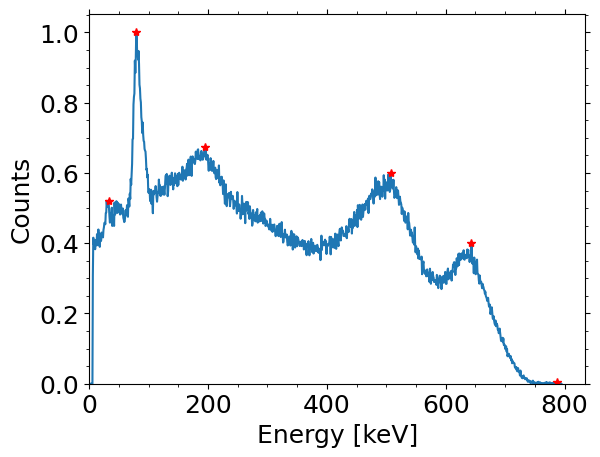

In [550]:
plot_with_maxima(Cs_fe_45, 19812, 45, background_df= background)

In [551]:
print("Ballpark energy " ,scattering(Cs_energy, 45))
print("Ballpark channel " , scattering(Cs_energy, 45)/0.777)

Ballpark energy  479.7459396308574
Ballpark channel  617.4336417385551


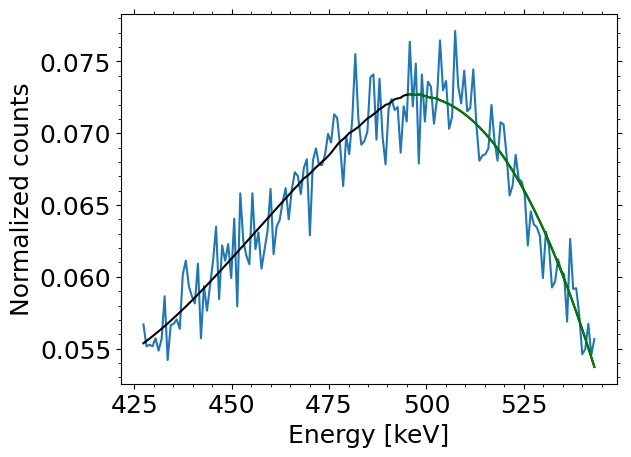

In [552]:
plot_peak(Cs_fe_45, 19812, 550, 700)

(21.676005207522756, 1.6087555034977278e-07)

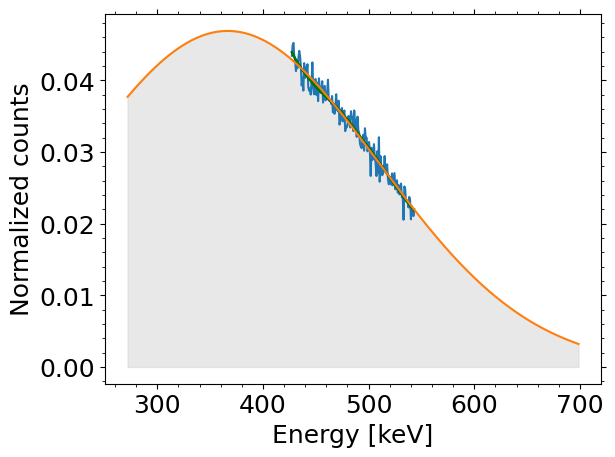

In [553]:
photopeak_count_fe_45 = photopeak_counter(Cs_fe_90, 19812, 550, 700)
photopeak_count_fe_45

In [554]:
calc_cross_section(photopeak_count_fe_45, 'Fe', 45)

135788704.90942872


(2.508930841887364e-30, 1.2053111869557181e-30)

So now I'm going to do this for all measurements.

### Iron at 90 degrees (Cs source)

,0,1,2,3,4,5,6,7
Energy,29.526000,80.808,142.191000,295.260000,382.284000,622.377000,738.927000,773.115000
Counts,0.353666,1.000,0.450561,0.400264,0.279552,0.077342,0.012372,0.011808


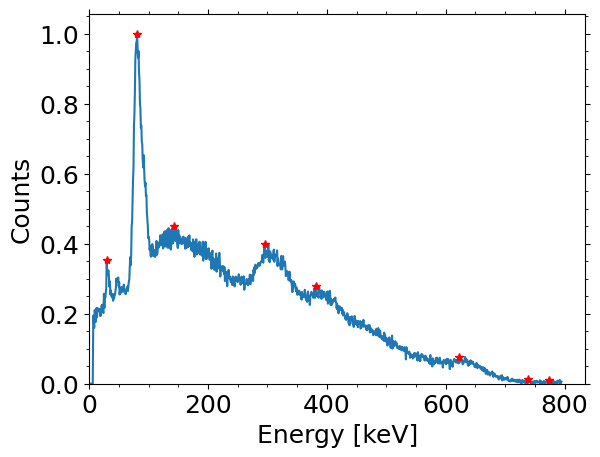

In [555]:
plot_with_maxima(Cs_fe_90, 78449, 90, background_df= background)

In [556]:
print("Ballpark energy " ,scattering(Cs_energy, 90))
print("Ballpark channel " , scattering(Cs_energy, 90)/0.777)

Ballpark energy  288.3331695773821
Ballpark channel  371.0851603312511


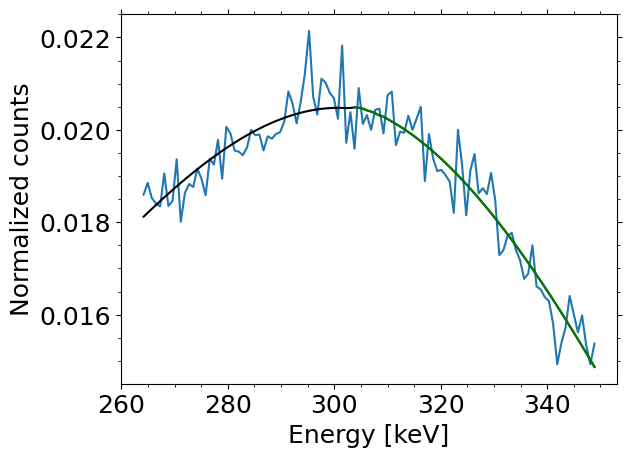

In [557]:
plot_peak(Cs_fe_90, 78449, 340, 450)

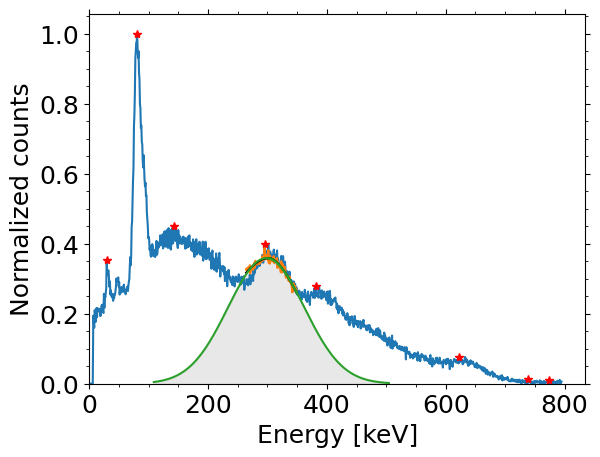

In [558]:
plot_with_maxima(Cs_fe_90, 78449, 90, background_df= background)
photopeak_count_fe_90 = photopeak_counter(Cs_fe_90, 78449, 340, 450, scale = 17.5)
photopeak_count_fe_90
plt.savefig("Gaussian Fit example.png", bbox_inches = "tight")

,0,1,2,3,4,5,6,7
Energy,29.526000,80.808,142.191000,295.260000,382.284000,622.377000,738.927000,773.115000
Counts,0.353666,1.000,0.450561,0.400264,0.279552,0.077342,0.012372,0.011808


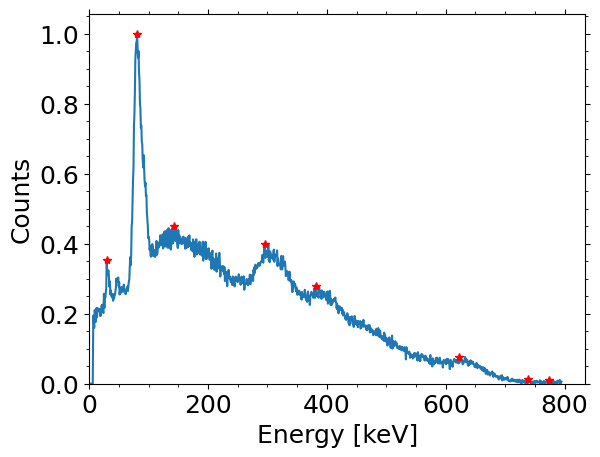

In [559]:
plot_with_maxima(Cs_fe_90, 78449, 90, background_df= background)

In [560]:
calc_cross_section(photopeak_count_fe_90, 'Fe', 90)

135788704.90942872


(2.463125621167569e-31, 1.1833059762457684e-31)

### Iron at 140 degrees (Cs source)

,0,1,2,3,4,5,6,7,8
Energy,30.303000,80.808,205.128000,314.685000,400.155000,424.242000,506.604000,655.788000,792.540000
Counts,0.336996,1.000,0.763545,0.269923,0.241635,0.221081,0.183355,0.250738,0.005918


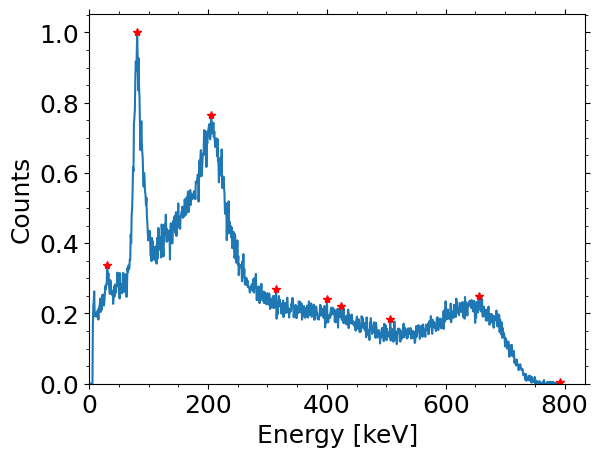

In [561]:
plot_with_maxima(Cs_fe_140, 15051, 140, background_df= background)

In [562]:
print("Ballpark energy " ,scattering(Cs_energy, 140))
print("Ballpark channel " , scattering(Cs_energy, 140)/0.777)

Ballpark energy  201.31573352822633
Ballpark channel  259.09360814443545


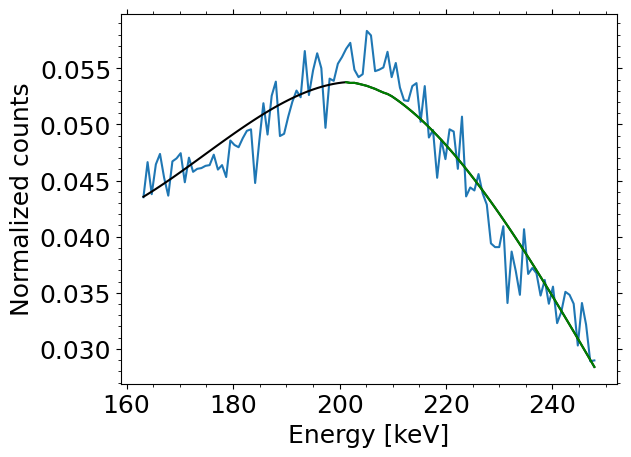

In [563]:
plot_peak(Cs_fe_140, 15051, 210, 320)

(8.055757939371821, 4.866105880870983e-10)

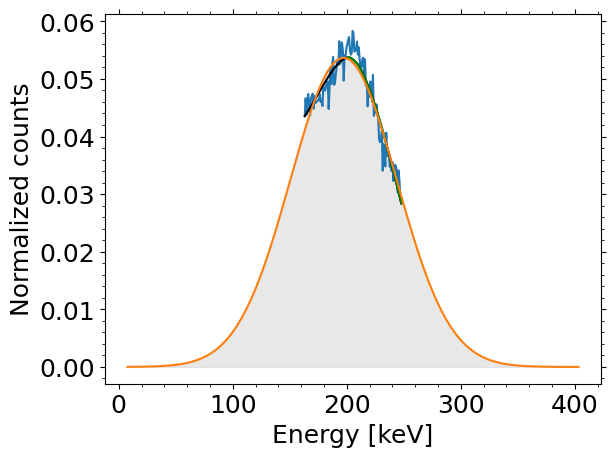

In [564]:
photopeak_count_fe_140 = photopeak_counter(Cs_fe_140, 15051, 210, 320)
photopeak_count_fe_140

In [565]:
calc_cross_section(photopeak_count_fe_140, 'Fe', 140)

135788704.90942872


(3.586266039225026e-31, 1.7228719478854513e-31)

### Copper at 0 degrees

,0,1,2,3,4
Energy,31.080000,78.477,204.351000,407.148000,647.241000
Counts,0.579307,1.000,0.753985,0.536414,0.812277


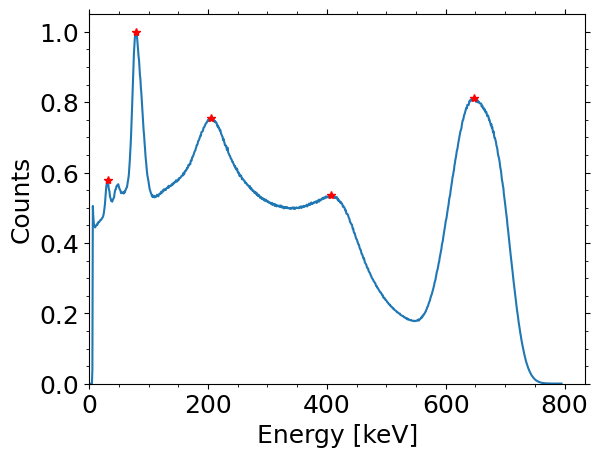

In [566]:
plot_with_maxima(Cs_cu_0, 334291, 0, background_df= background)

In [567]:
print("Ballpark energy " ,scattering(Cs_energy, 0))
print("Ballpark channel " , scattering(Cs_energy, 0)/0.777)

Ballpark energy  661.7
Ballpark channel  851.6087516087516


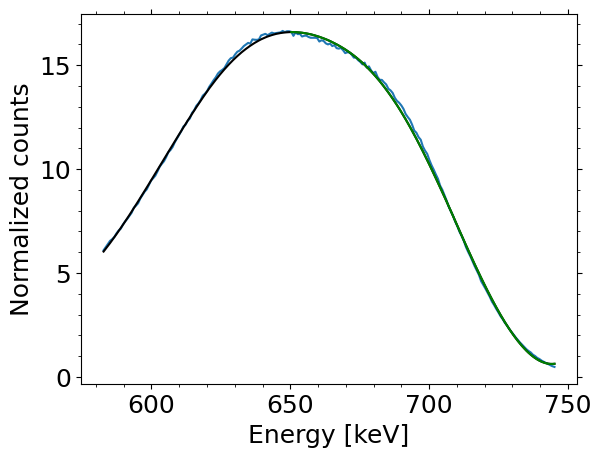

In [568]:
plot_peak(Cs_cu_0, 15051, 750, 960)

(2489.892649020764, 1.2349255229249234e-06)

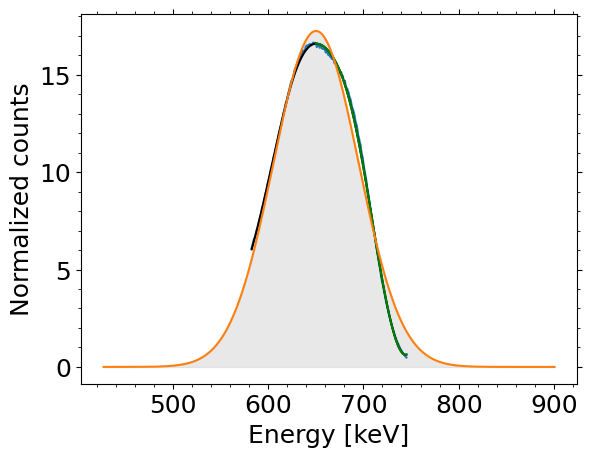

In [569]:
photopeak_count_cu_0 = photopeak_counter(Cs_cu_0, 15051, 750, 960)
photopeak_count_cu_0

In [570]:
calc_cross_section(photopeak_count_cu_0, 'Cu', 0)

135788704.90942872


(4.514736830924823e-28, 2.167237426976469e-28)

### Copper at 45 degrees

,0,1,2,3,4
Energy,30.303000,80.031,192.696000,506.604000,634.809000
Counts,0.546778,1.000,0.683575,0.601036,0.383911


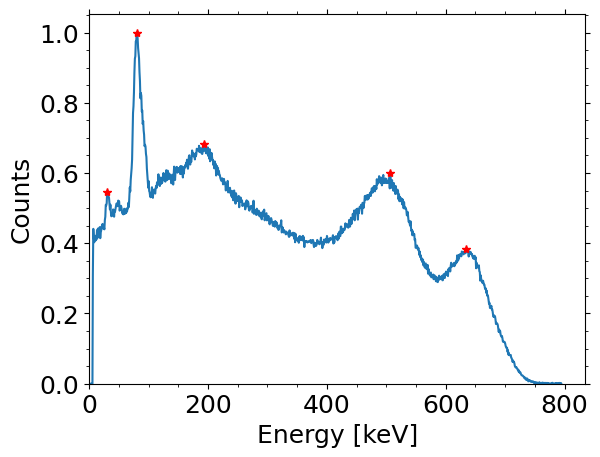

In [571]:
plot_with_maxima(Cs_cu_45, 68085, 0, background_df= background)

In [572]:
print("Ballpark energy " ,scattering(Cs_energy, 45))
print("Ballpark channel " , scattering(Cs_energy, 45)/0.777)

Ballpark energy  479.7459396308574
Ballpark channel  617.4336417385551


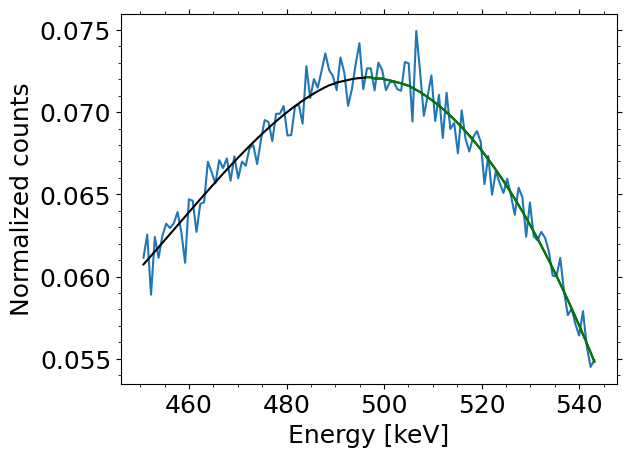

In [573]:
plot_peak(Cs_cu_45, 68085, 580, 700)

(16.095483619779753, 1.3300980387449918e-11)

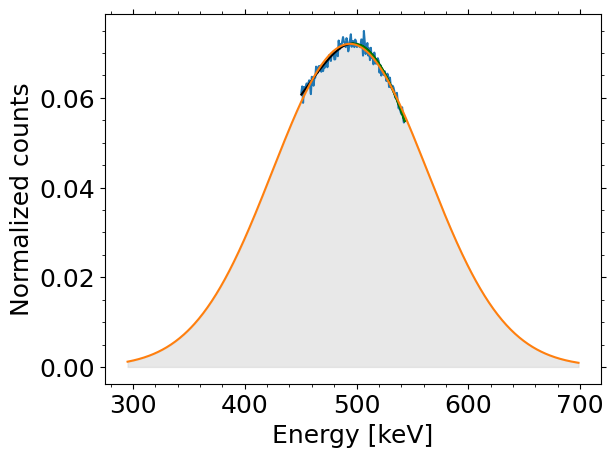

In [574]:
photopeak_count_cu_45 = photopeak_counter(Cs_cu_45, 68085, 580, 700)
photopeak_count_cu_45

In [575]:
calc_cross_section(photopeak_count_cu_45, 'Cu', 45)

135788704.90942872


(1.7510844751884122e-30, 8.405840593141442e-31)

### Copper at 90 degrees

,0,1,2,3,4,5
Energy,31.080000,83.139000,142.968000,300.699,634.809000,780.885000
Counts,0.427265,0.916789,0.797995,1.000,0.075207,0.010927


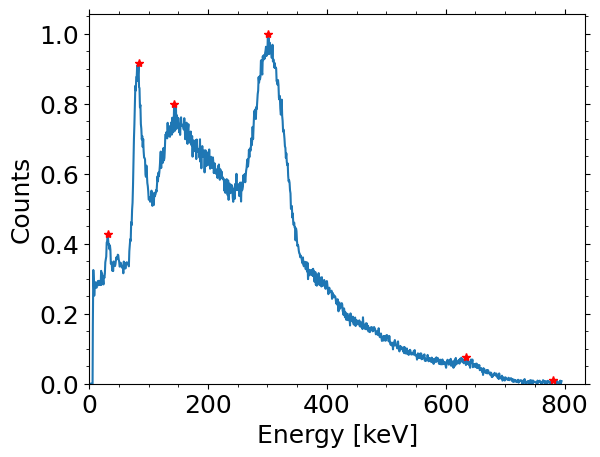

In [576]:
plot_with_maxima(Cs_cu_90, 71059, 0, background_df= background)

In [577]:
print("Ballpark energy " ,scattering(Cs_energy, 90))
print("Ballpark channel " , scattering(Cs_energy, 90)/0.777)

Ballpark energy  288.3331695773821
Ballpark channel  371.0851603312511


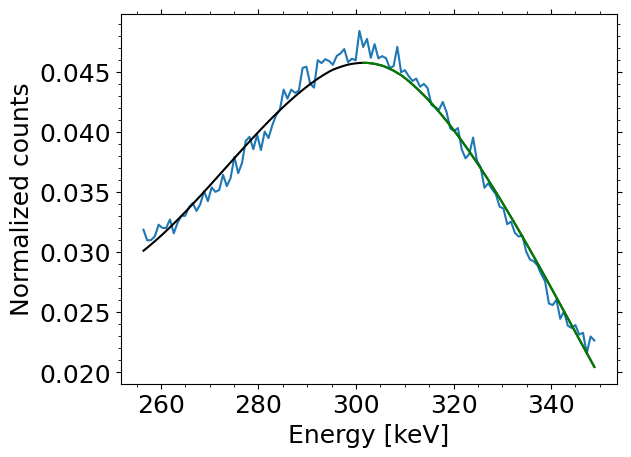

In [578]:
plot_peak(Cs_cu_90, 71059, 330, 450)

(6.101797146584019, 5.534288890376537e-09)

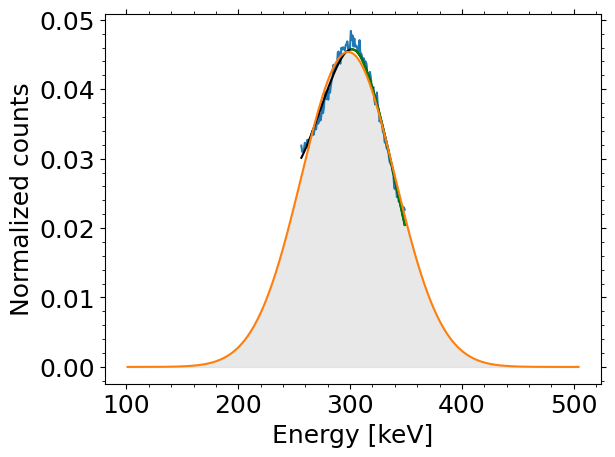

In [579]:
photopeak_count_cu_90 = photopeak_counter(Cs_cu_90, 71059, 330, 450)
photopeak_count_cu_90

In [580]:
calc_cross_section(photopeak_count_cu_90, 'Cu', 90)

135788704.90942872


(3.319180245383157e-31, 1.5933269041974956e-31)

### Aluminum at 0 degrees

,0,1,2,3,4
Energy,30.303000,77.700000,198.13500,400.155000,648.795
Counts,0.608951,0.994327,0.78467,0.602283,1.000


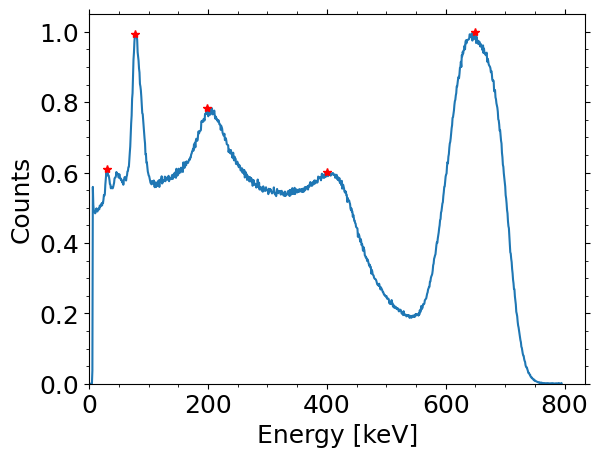

In [581]:
plot_with_maxima(Cs_al_0, 10684, 0, background_df= background)

In [582]:
print("Ballpark energy " ,scattering(Cs_energy, 0))
print("Ballpark channel " , scattering(Cs_energy, 0)/0.777)

Ballpark energy  661.7
Ballpark channel  851.6087516087516


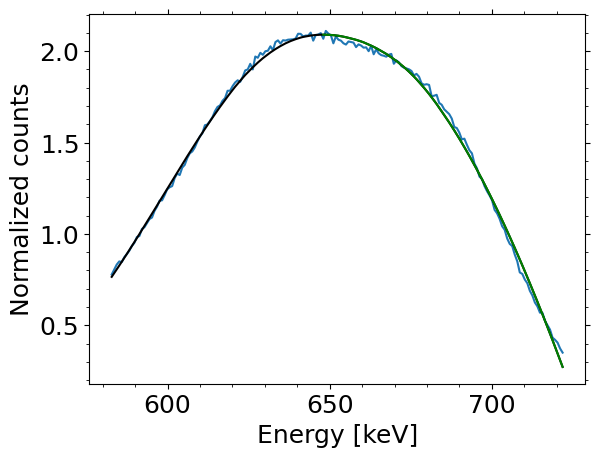

In [583]:
plot_peak(Cs_al_0, 10684, 750, 930)

(316.48280420943155, 1.0360485000818209e-07)

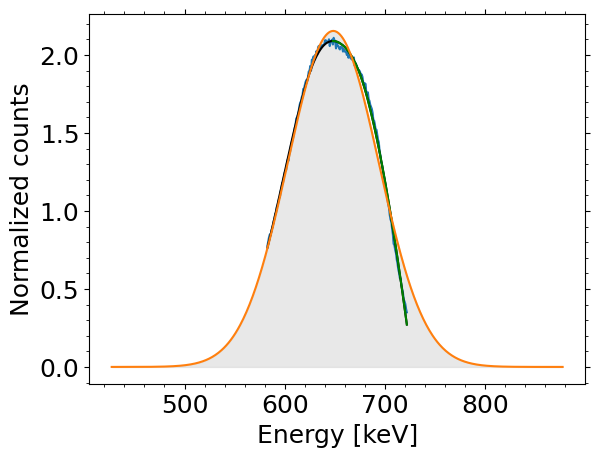

In [584]:
photopeak_count_al_0 = photopeak_counter(Cs_al_0, 10684, 750, 930)
photopeak_count_al_0

In [585]:
calc_cross_section(photopeak_count_al_0, 'Al', 0)

135788704.90942872


(1.7849858755118285e-28, 8.524696107860394e-29)

### Aluminum at 45 degrees

,0,1,2,3,4,5,6,7,8
Energy,33.411000,78.477,121.989000,198.912000,266.511000,334.110000,370.629000,493.395000,627.039000
Counts,0.540526,1.000,0.594318,0.647426,0.489962,0.438464,0.412564,0.553495,0.441759


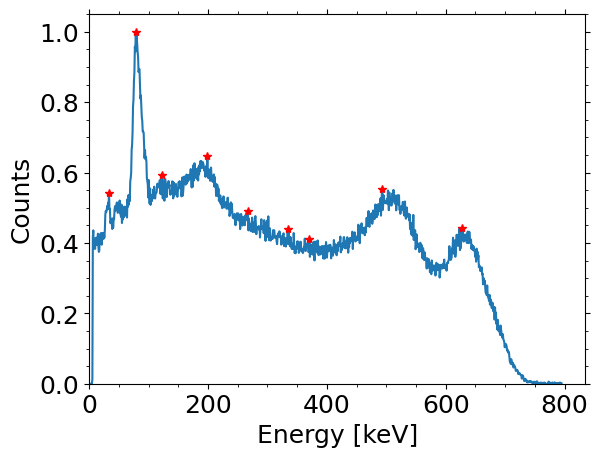

In [586]:
plot_with_maxima(Cs_al_45, 17464, 0, background_df= background)

In [587]:
print("Ballpark energy " ,scattering(Cs_energy, 45))
print("Ballpark channel " , scattering(Cs_energy, 45)/0.777)

Ballpark energy  479.7459396308574
Ballpark channel  617.4336417385551


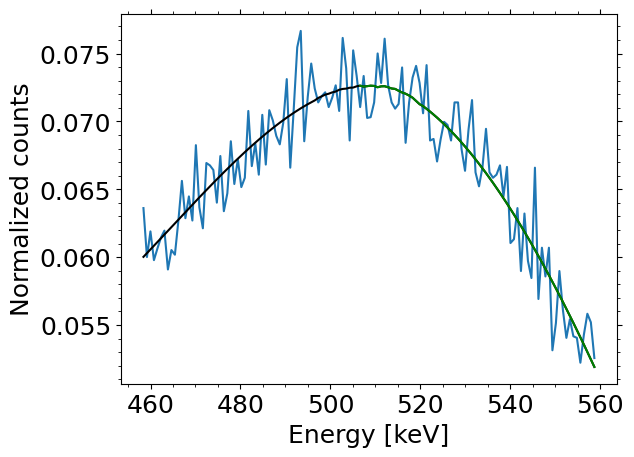

In [588]:
plot_peak(Cs_al_45, 17464, 590, 720)

(16.127117919686405, 1.4650902300991495e-11)

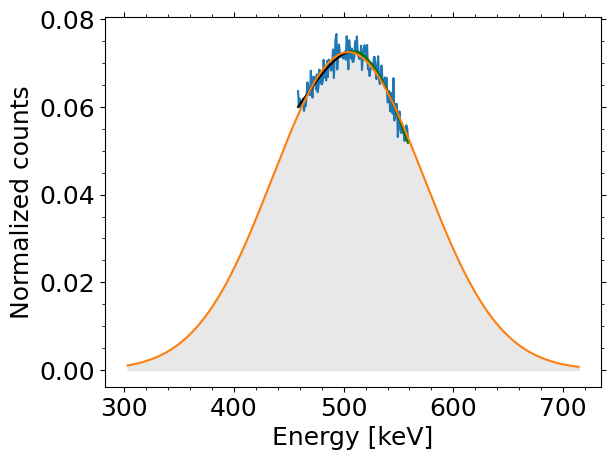

In [589]:
photopeak_count_al_45 = photopeak_counter(Cs_al_45, 17464, 590, 720)
photopeak_count_al_45

In [590]:
calc_cross_section(photopeak_count_al_45, 'Al', 45)

135788704.90942872


(5.4574865963910835e-30, 2.6063743911003404e-30)

### Aluminum at 90 degrees

,0,1,2,3,4,5,6,7,8
Energy,31.857000,80.808,142.968000,204.351000,291.375000,379.953000,592.074000,634.032000,780.885000
Counts,0.433267,1.000,0.741772,0.593312,0.884381,0.285787,0.087372,0.079099,0.012888


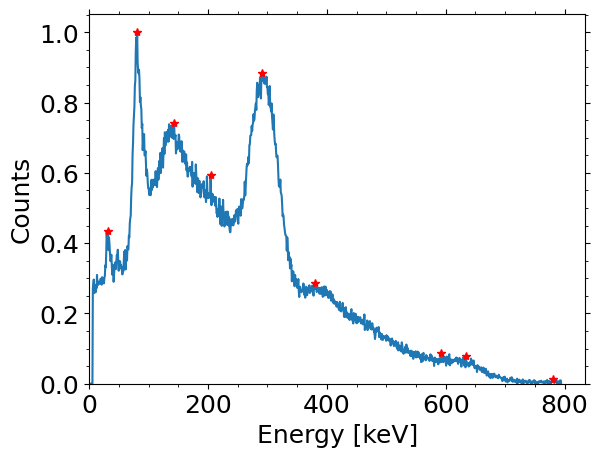

In [591]:
plot_with_maxima(Cs_al_90, 72712, 0, background_df= background)

In [592]:
print("Ballpark energy " ,scattering(Cs_energy, 90))
print("Ballpark channel " , scattering(Cs_energy, 90)/0.777)

Ballpark energy  288.3331695773821
Ballpark channel  371.0851603312511


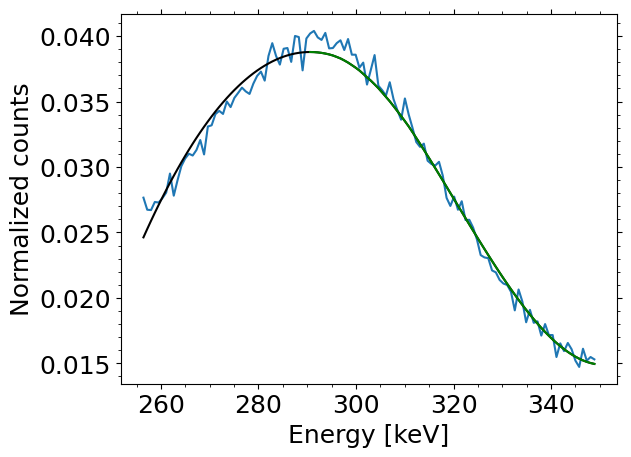

In [593]:
plot_peak(Cs_al_90, 72712, 330, 450)

(4.752294837383828, 5.9661676241312e-08)

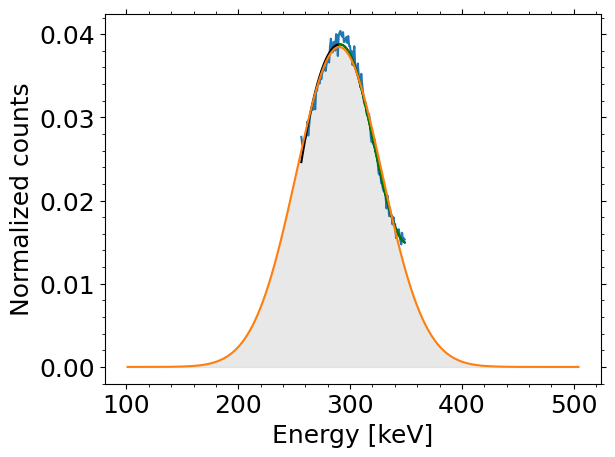

In [594]:
photopeak_count_al_90 = photopeak_counter(Cs_al_90, 72712, 330, 450)
photopeak_count_al_90

In [595]:
calc_cross_section(photopeak_count_al_90,'Al', 90)

135788704.90942872


(8.0409858433109e-31, 3.8401962838235775e-31)

### Aluminum at 140

,0,1,2,3,4
Energy,31.080000,79.254000,208.236,618.492000,773.115000
Counts,0.239891,0.519471,1.000,0.122348,0.006667


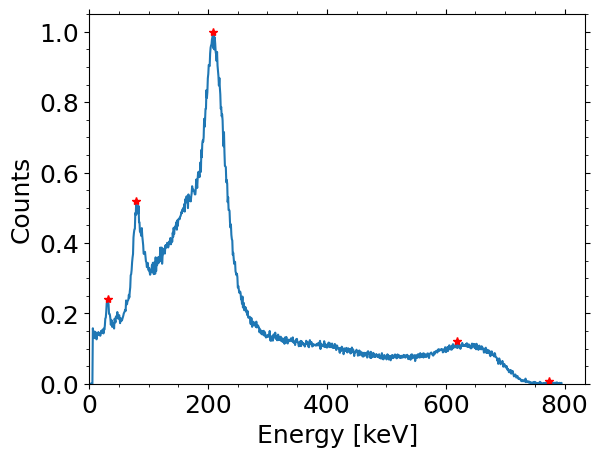

In [596]:
plot_with_maxima(Cs_al_140, 68219, 0, background_df= background)

In [597]:
print("Ballpark energy " ,scattering(Cs_energy, 140))
print("Ballpark channel " , scattering(Cs_energy, 140)/0.777)

Ballpark energy  201.31573352822633
Ballpark channel  259.09360814443545


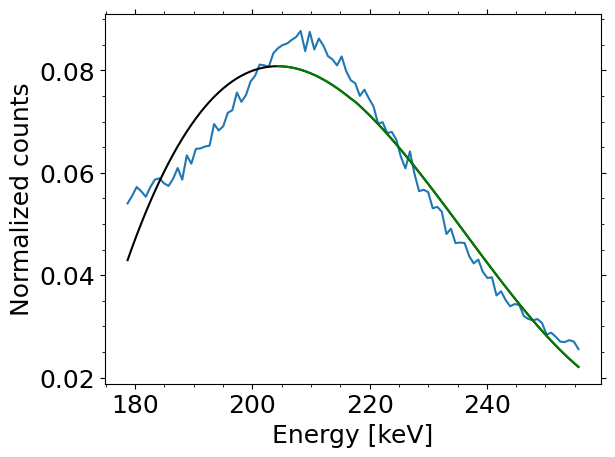

In [598]:
plot_peak(Cs_al_140, 68219, 230, 330)

(7.561761526776116, 7.162170674108103e-12)

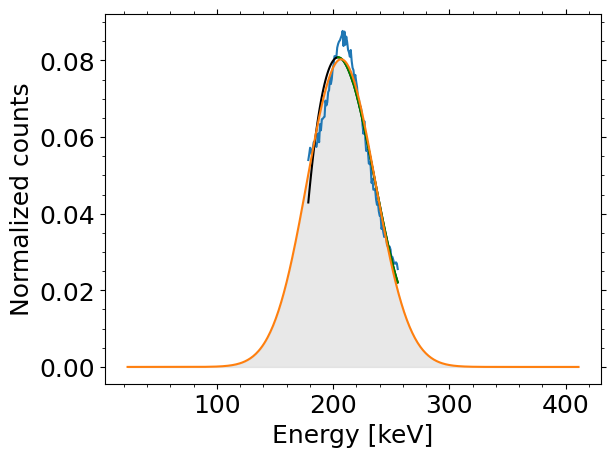

In [599]:
photopeak_count_al_140 = photopeak_counter(Cs_al_140, 68219, 230, 330)
photopeak_count_al_140

In [600]:
calc_cross_section(photopeak_count_al_140, 'Al', 140)

135788704.90942872


(9.842049508212365e-31, 4.700344259410931e-31)

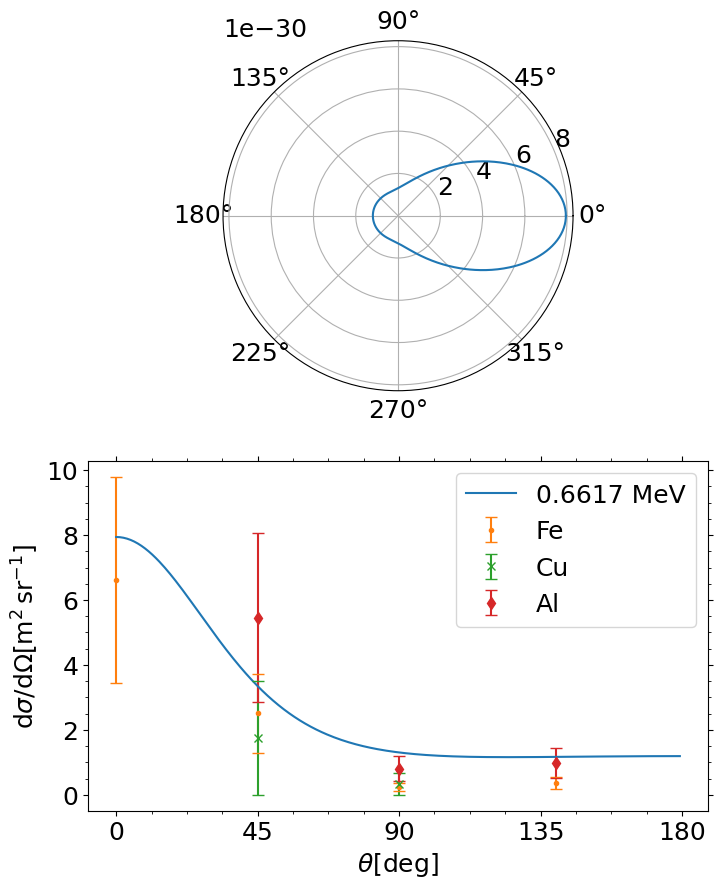

In [618]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import e, h, hbar, alpha, c, m_e
import matplotlib.ticker as ticker
DPI = 100

# A bunch of constants factored into a single variable.
f = (hbar * alpha / m_e / c)**2 / 2
# A grid of scattering angles in rad.
theta = np.arange(0, 2*np.pi, 0.01)
n = len(theta)


def plot_diff_xsec(E):
    """Plot the differential cross section for incoming photon energy, E."""

    # Incoming photon frequency (s-1) and wavelength (m).
    nu = E * 1.e6 * e / h
    lam = c / nu

    # Scattered photon wavelength (m).
    lamp = lam + h / m_e / c * (1 - np.cos(theta))
    P = lam / lamp
    # Differential cross section given by the Klein-Nishina formula.
    dsigma_dOmega = f * P**2 * (P + 1/P - np.sin(theta)**2)

    # Plot the polar and Cartesian plots.
    ax1.plot(theta, dsigma_dOmega, label=str(E) + r' MeV')
    # Because of the symmetry, we only really need angles 0 -> 180 deg.
    ax2.plot(np.degrees(theta[:n//2]), dsigma_dOmega[:n//2],
             label=str(E) + r' MeV')

# A Matplotlib figure with a polar Axes above a Cartesian one.
fig = plt.figure(figsize=(800/DPI, 1000/DPI))
ax1 = fig.add_subplot(211, projection='polar')
ax2 = fig.add_subplot(212)

# Our grid of photon energies (in MeV).
Egrid = 0.01, 0.1, 0.6617, 10
plot_diff_xsec(0.6617)
# plt.scatter(0, 32.4e-30)
ax2.set_xlabel(r'$\theta[\mathrm{deg}]$')
ax2.set_ylabel(r'$\mathrm{d}\sigma/\mathrm{d}\Omega[\mathrm{m^2\,sr^{-1}}]$')
scale_y = 1e-30
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
ax2.yaxis.set_major_formatter(ticks_y)
# Set the Cartesian x-axis ticks to sensible values (in degrees).
ax2.set_xticks([0, 45, 90, 135, 180])

# Iron values
plt.errorbar([0, 45, 90, 140], [6.62e-30, 2.51e-30, 0.25e-30, 0.36e-30], yerr = [3.18e-30, 1.21e-30, 0.12e-30, 0.18e-30], fmt = '.', capsize = 4, label = 'Fe')

# Copper values
plt.errorbar([45, 90], [1.75e-30, 0.33e-30], yerr = [1.75e-30, 0.33e-30], fmt = 'x', capsize = 4, label = 'Cu')

# Iron values
plt.errorbar([45, 90, 140], [5.46e-30, 0.81e-30, 0.98e-30], yerr = [2.61e-30, 0.38e-30, 0.47e-30], fmt = 'd', capsize = 4, label = 'Al')

plt.legend()
plt.yscale
plt.savefig('Klein-Nishina.png', bbox_inches = "tight")